<a href="https://colab.research.google.com/github/kc2409/dv/blob/main/Data_new_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_excel('1zomato.xlsx')
df.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df.shape

(9551, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

In [7]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
cat_col

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [8]:
num_col=[col for col in df.columns if df[col].dtype!='object']
num_col

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
categorical_data = df[cat_col]
categorical_data

Restaurant Name              City  \
0             Le Petit Souffle       Makati City   
1             Izakaya Kikufuji       Makati City   
2       Heat - Edsa Shangri-La  Mandaluyong City   
3                         Ooma  Mandaluyong City   
4                  Sambo Kojin  Mandaluyong City   
...                        ...               ...   
9546              NamlÛ± Gurme         ÛÁstanbul   
9547             Ceviz AÛôacÛ±         ÛÁstanbul   
9548                     Huqqa         ÛÁstanbul   
9549              Aôôk Kahve         ÛÁstanbul   
9550  Walter's Coffee Roastery         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose  \
0     Century City Mall, Poblacion, Makati City, Mak...   
1     Little Tokyo, Legaspi Village, Makati City, Ma...   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...   
...                                                 ...   
9546                                Karakí_y, ÛÁstanbul   
9547                               Koôuyolu, ÛÁstanbul   
9548                             Kuruí_eôme, ÛÁstanbul   
9549                             Kuruí_eôme, ÛÁstanbul   
9550                                    Moda, ÛÁstanbul   

                              Cuisines          Currency Has Table booking  \
0           French, Japanese, Desserts  Botswana Pula(P)               Yes   
1                             Japanese  Botswana Pula(P)               Yes   
2     Seafood, Asian, Filipino, Indian  Botswana Pula(P)               Yes   
3                      Japanese, Sushi  Botswana Pula(P)                No   
4                     Japanese, Korean  Botswana Pula(P)               Yes   
...                                ...               ...               ...   
9546                           Turkish  Turkish Lira(TL)                No   
9547   World Cuisine, Patisserie, Cafe  Turkish Lira(TL)                No   
9548            Italian, World Cuisine  Turkish Lira(TL)                No   
9549                   Restaurant Cafe  Turkish Lira(TL)                No   
9550                              Cafe  Turkish Lira(TL)                No   

     Has Online delivery Is delivering now Switch to order menu Rating color  \
0                     No                No                   No   Dark Green   
1                     No                No                   No   Dark Green   
2                     No                No                   No        Green   
3                     No                No                   No   Dark Green   
4         

In [11]:
df[cat_col] = df[cat_col].astype(str)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


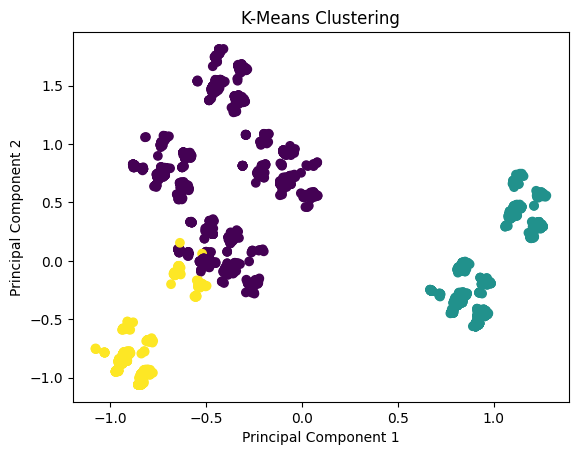

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
categorical_data = df[cat_col]

# Apply one-hot encoding to the categorical data
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data)

# Perform k-means clustering
n_clusters = 3  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Visualize the clusters (you may need to reduce dimensions for visualization)
# For instance, you can use PCA for dimensionality reduction before plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data.toarray())

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [13]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 49.9 MB/s eta 0:00:00


In [14]:
reduced_data

array([[-0.4627264 ,  0.22915492],
       [-0.46313567,  0.23000638],
       [-0.573075  ,  0.32868072],
       ...,
       [-0.82808162,  0.7871938 ],
       [-0.59262193,  0.06339876],
       [-0.58967826,  0.06188246]])

In [15]:
import sweetviz as sv
from sklearn.model_selection import train_test_split
my_report = sv.analyze(df)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.sou

In [16]:
my_report.show_html('eda_report.html')

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
from IPython.display import display, HTML


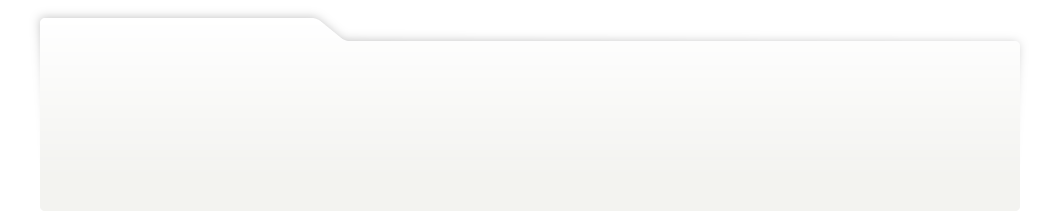
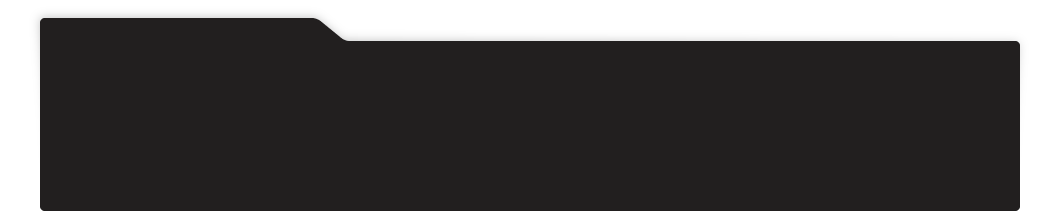
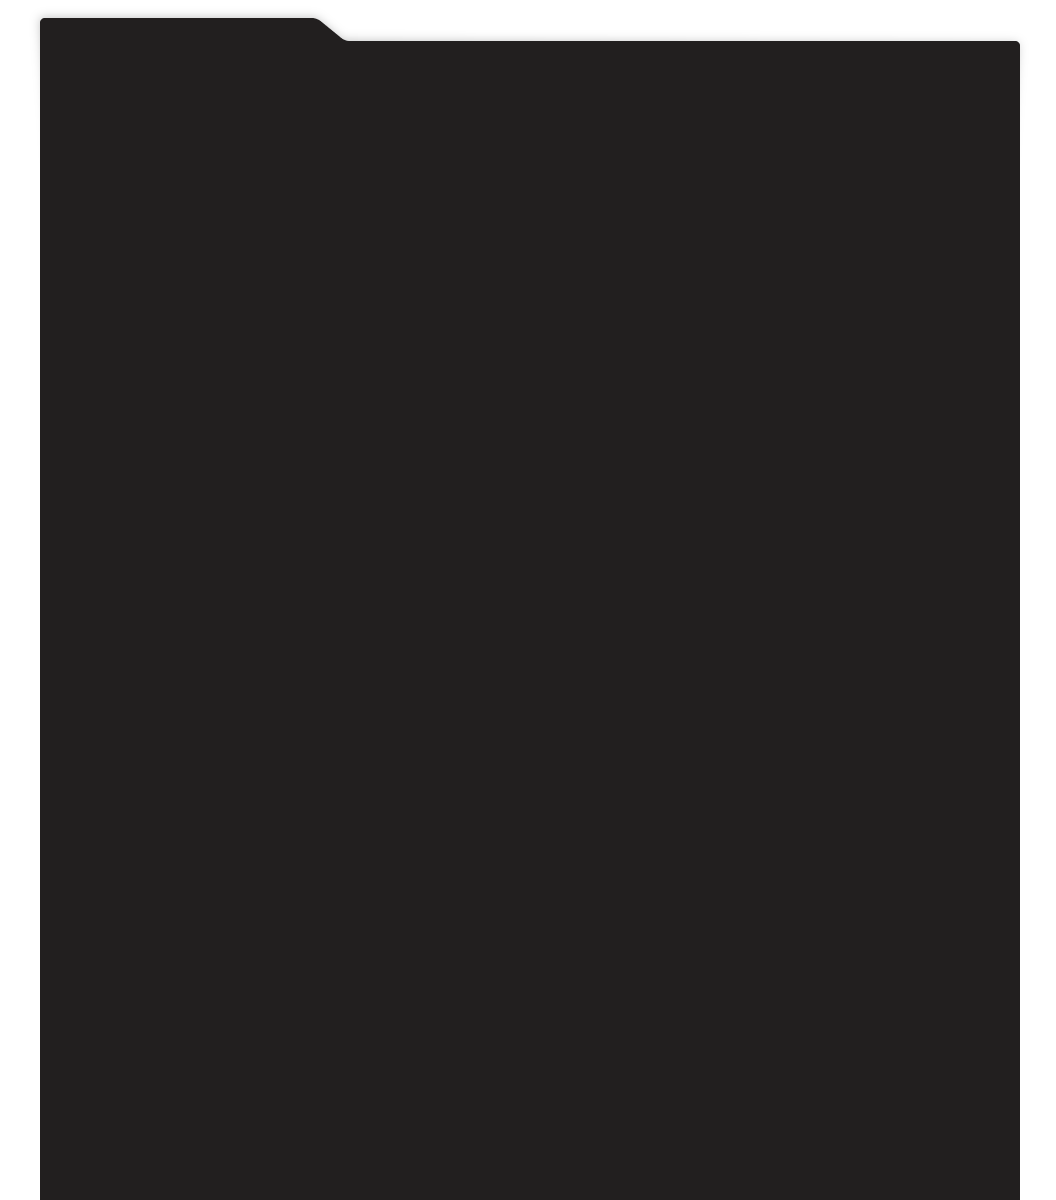
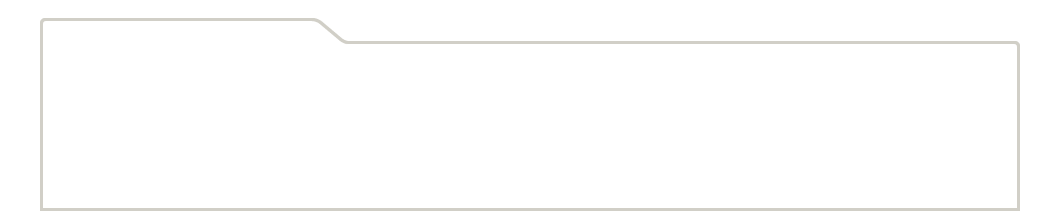
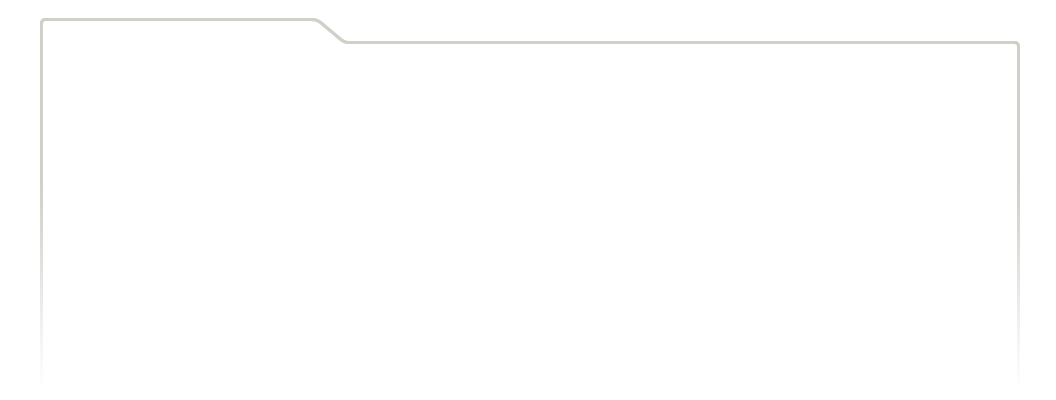
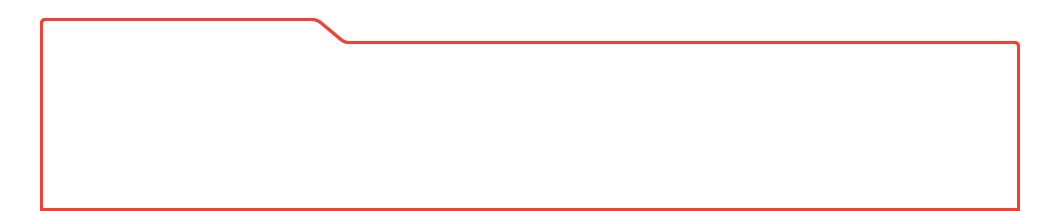
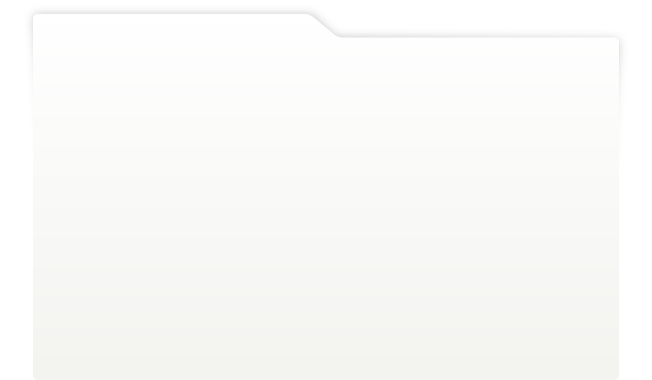
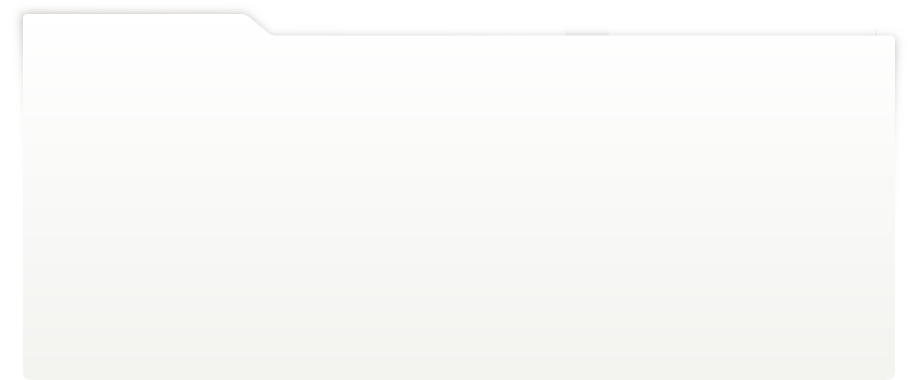
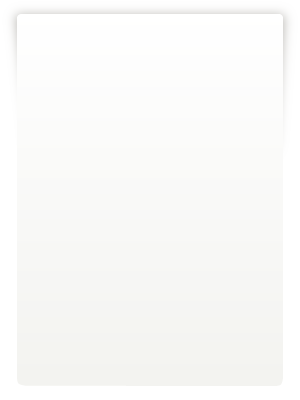
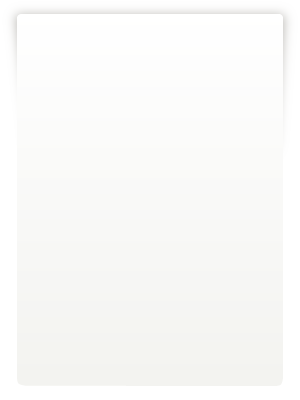
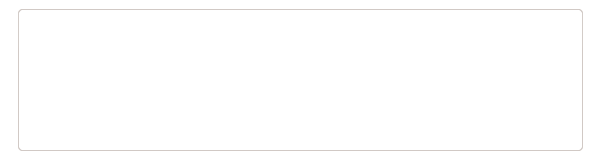
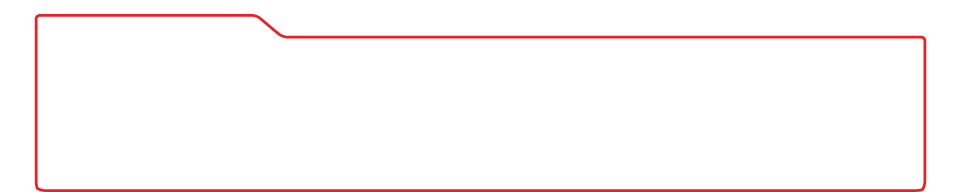
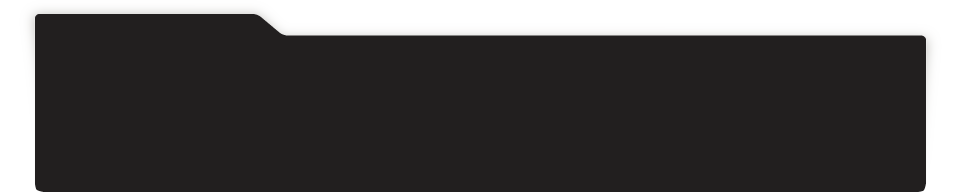
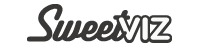
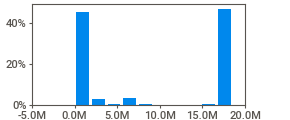
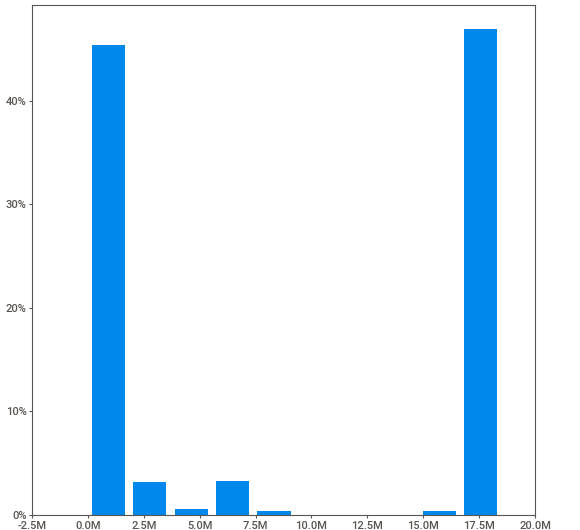
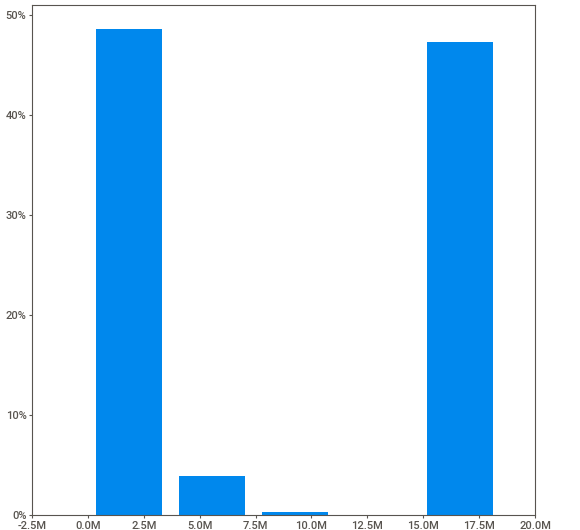
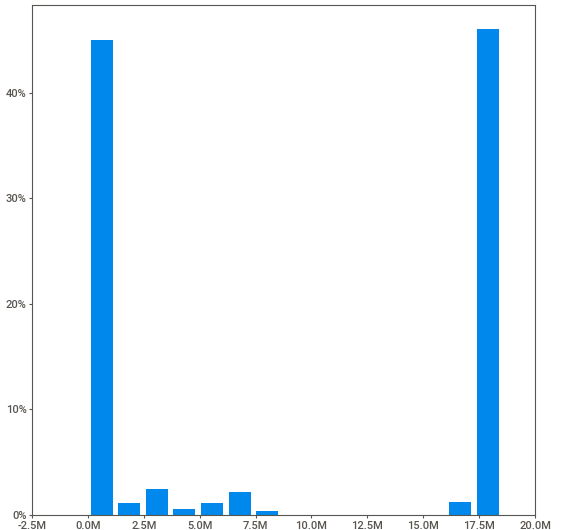
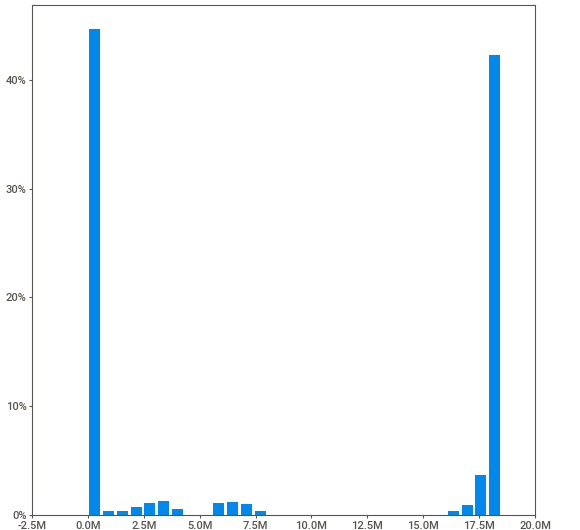
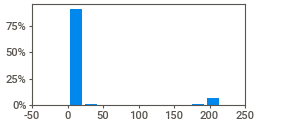
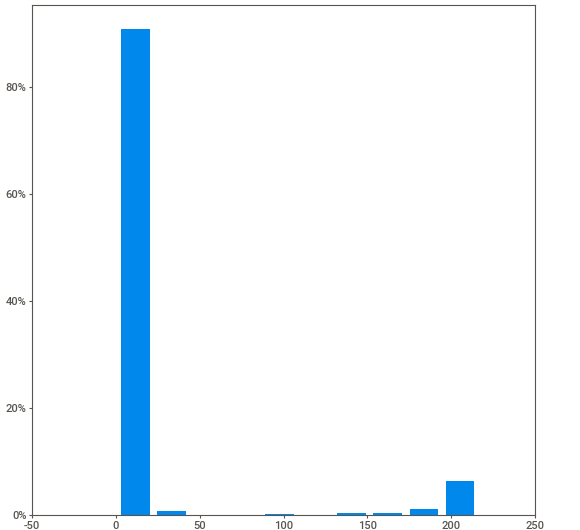
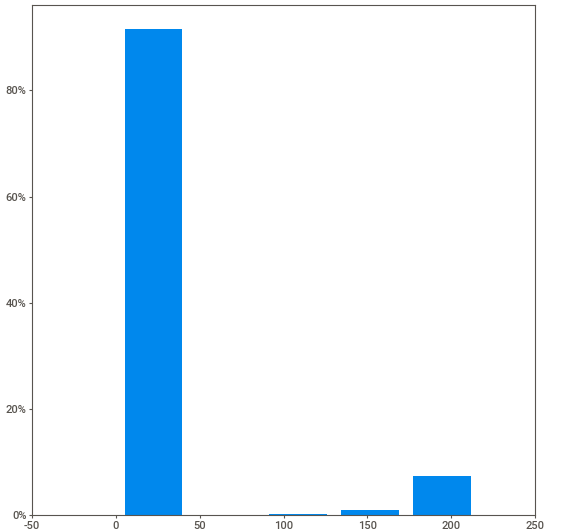
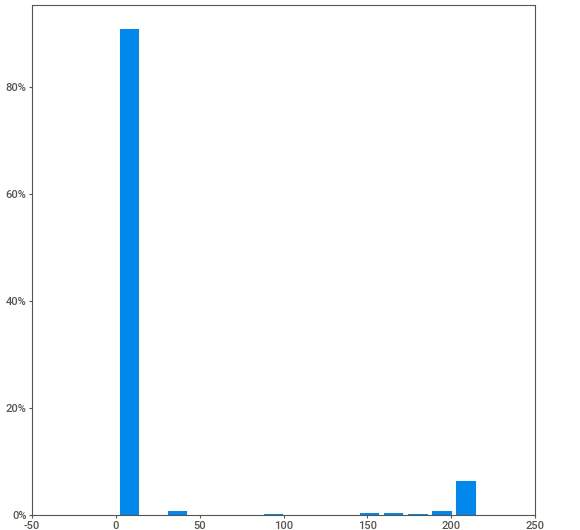
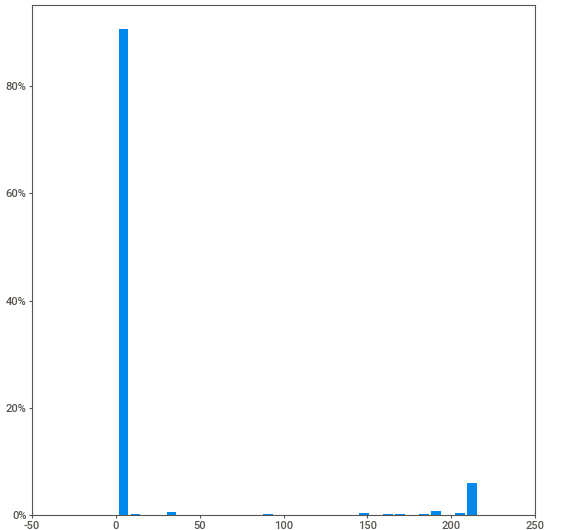
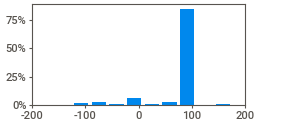
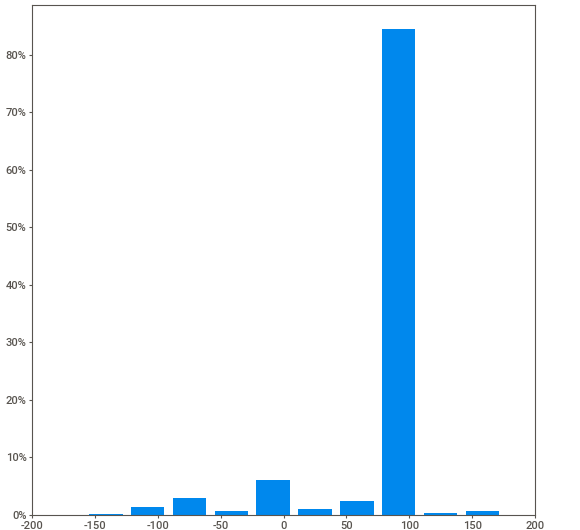
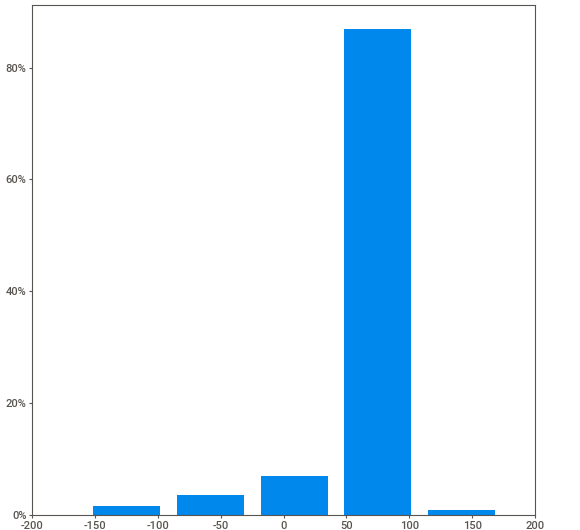
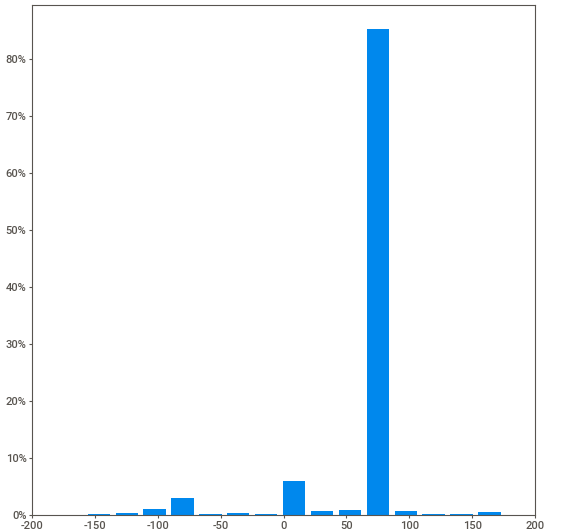
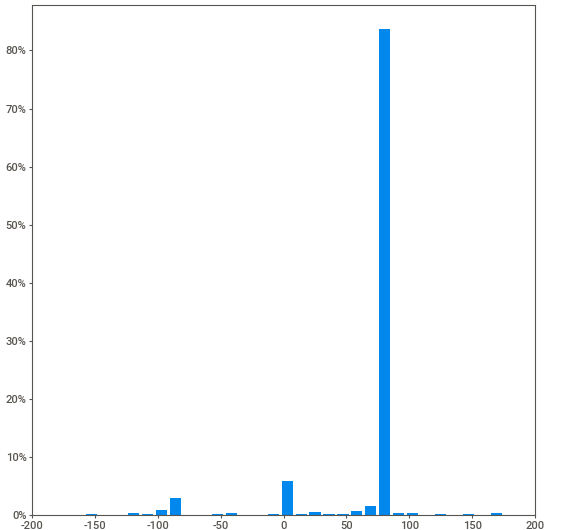
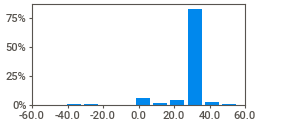
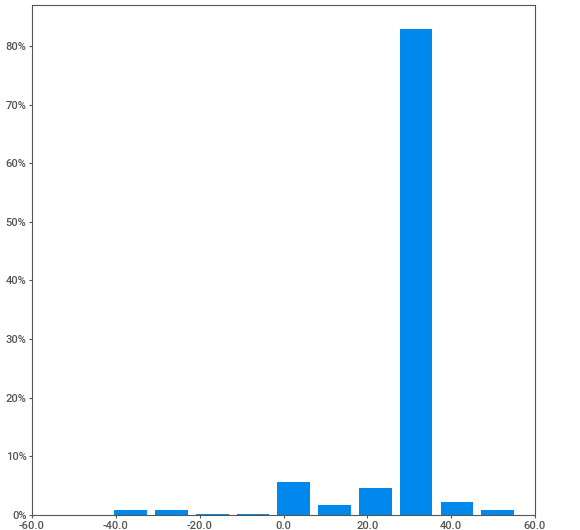
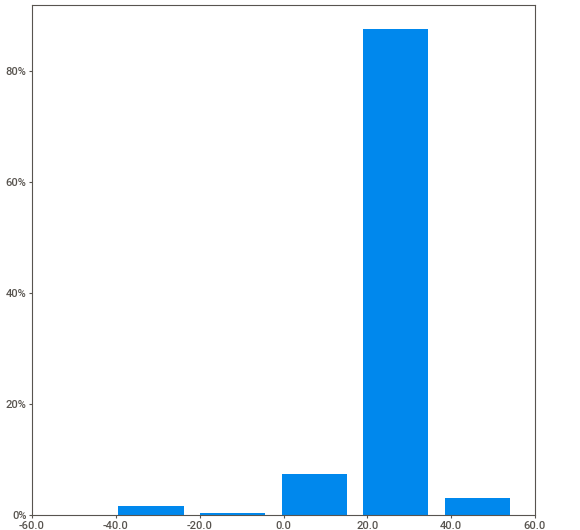
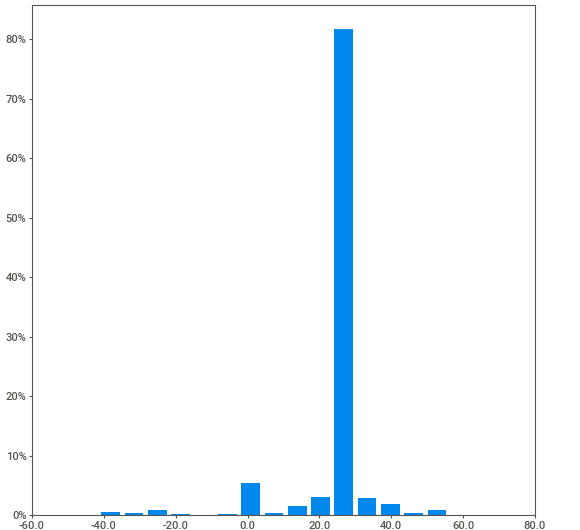
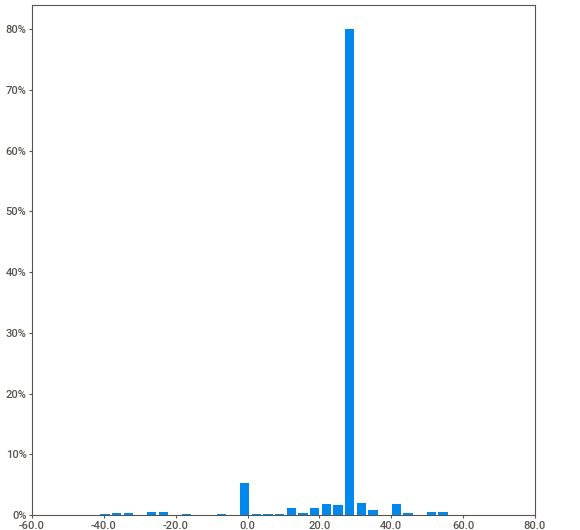
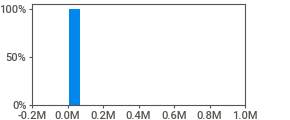
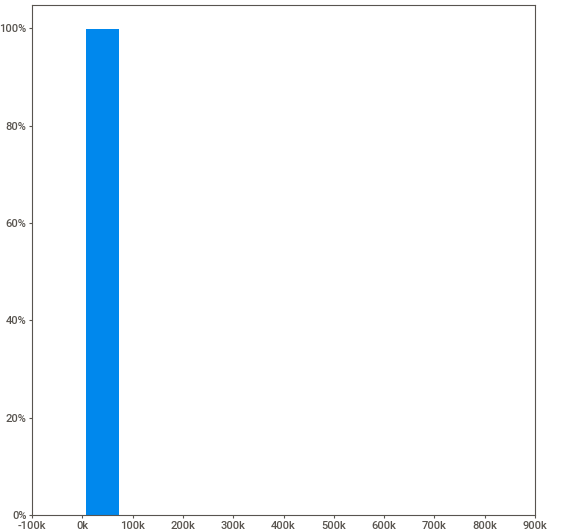
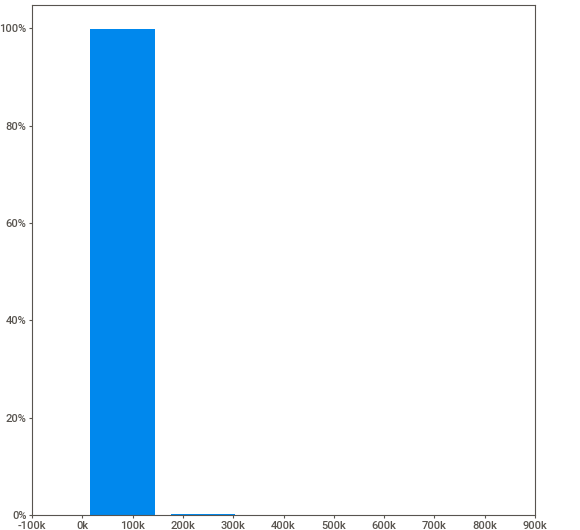
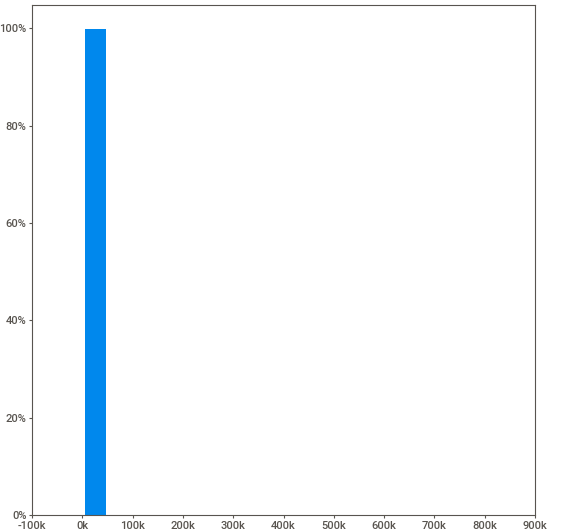
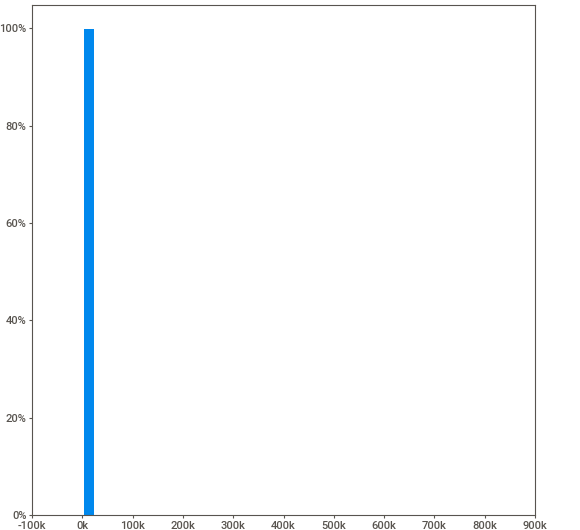
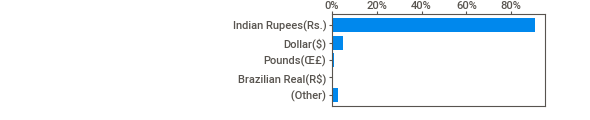
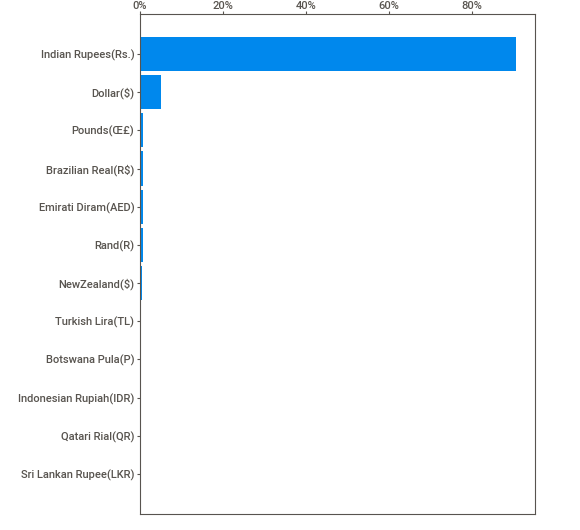
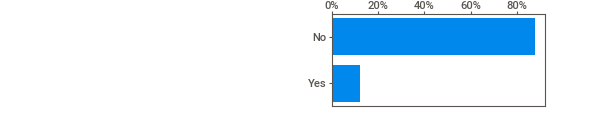
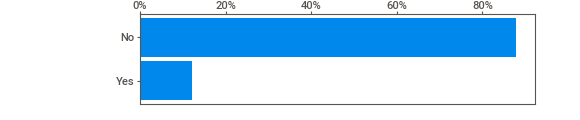
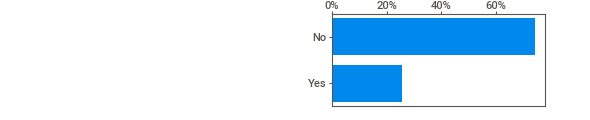
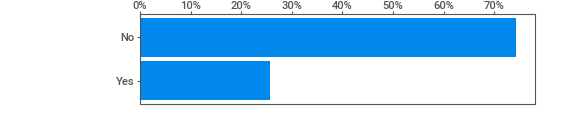
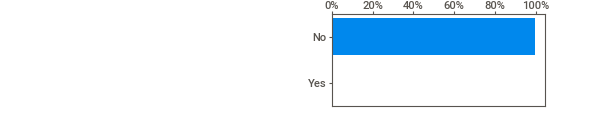
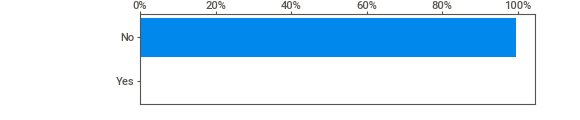
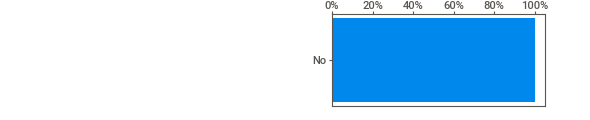
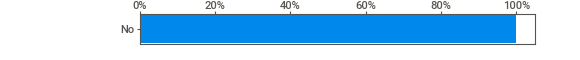
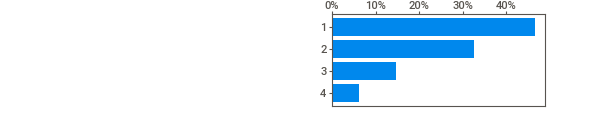
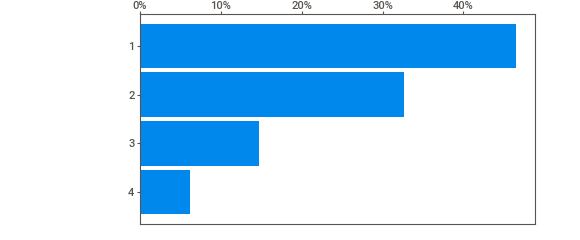
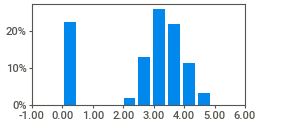
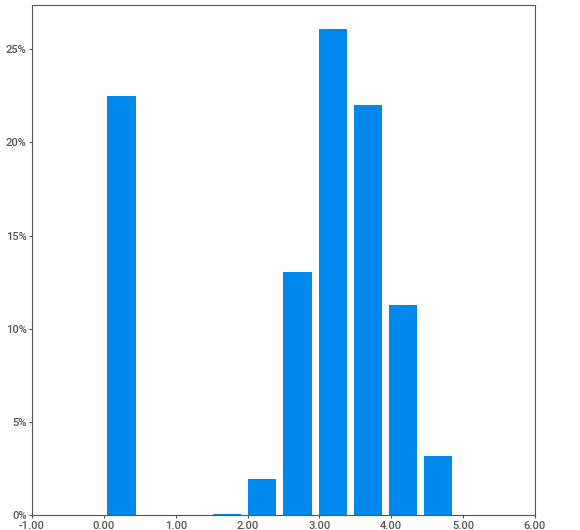
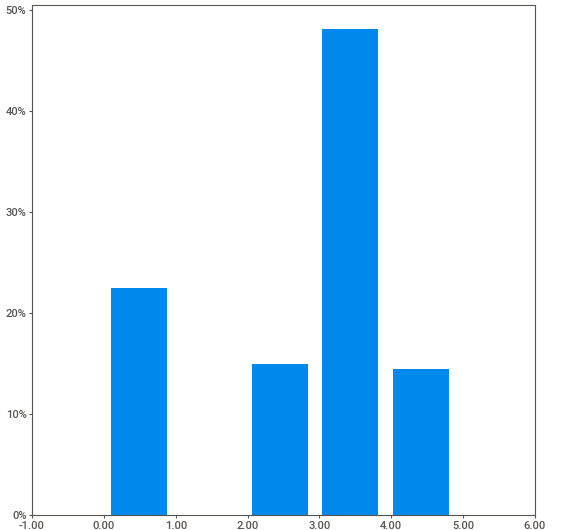
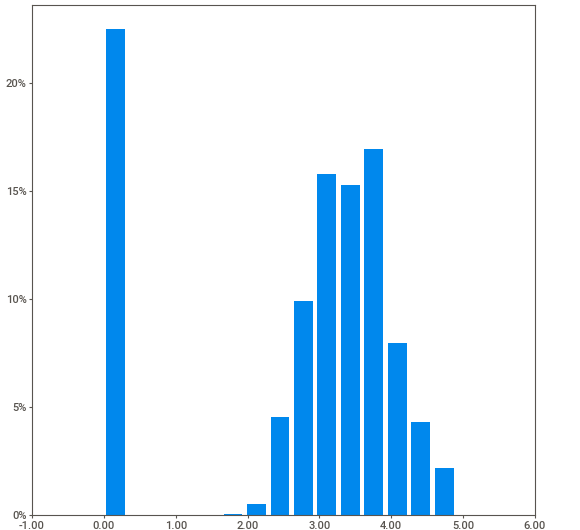
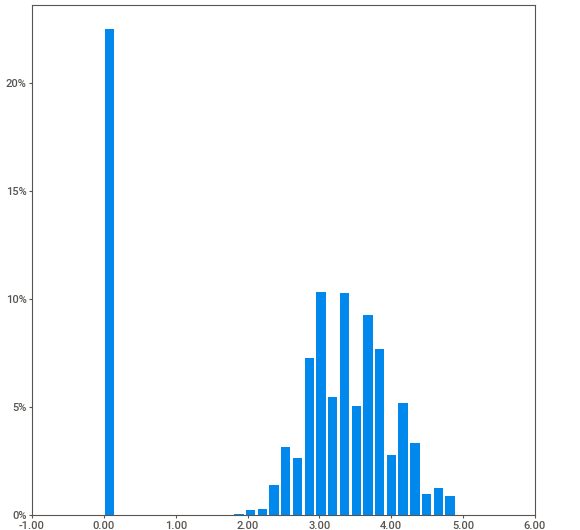
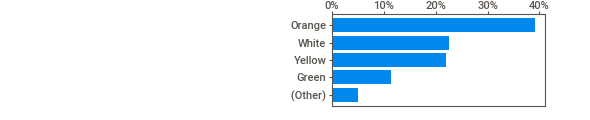
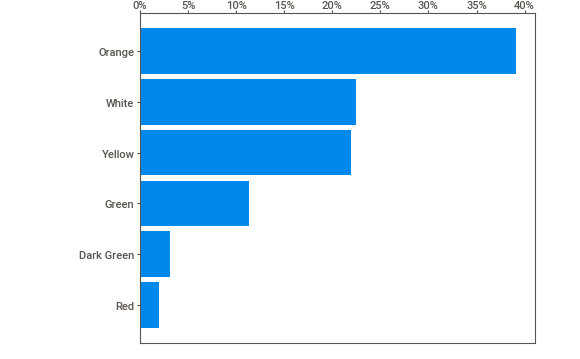
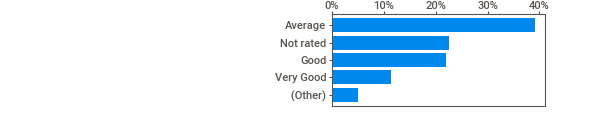
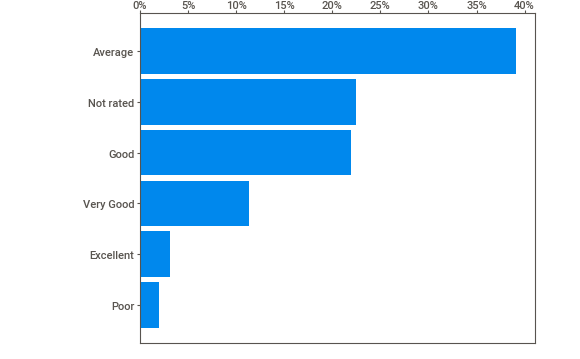
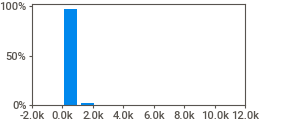
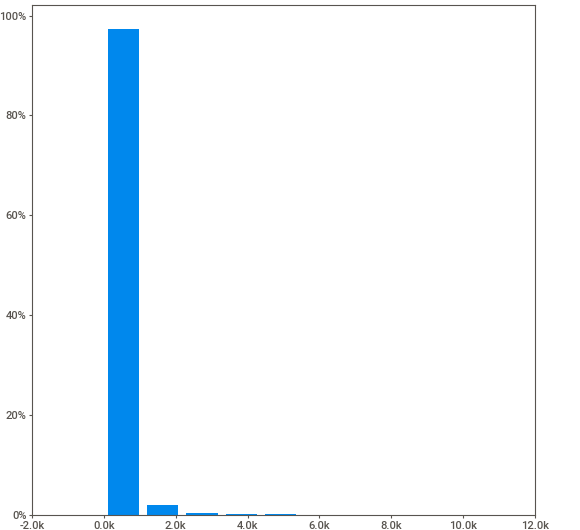
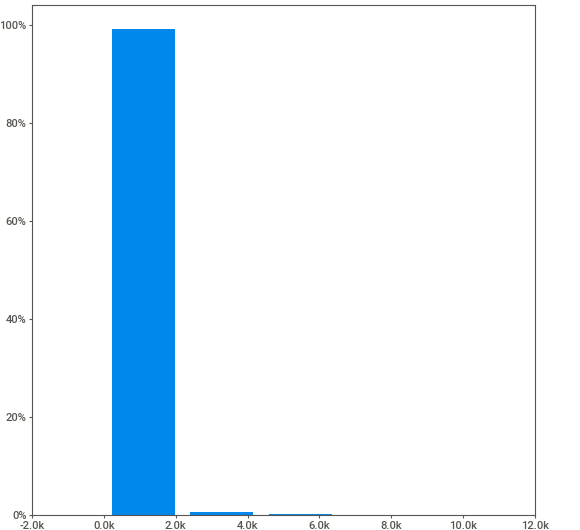
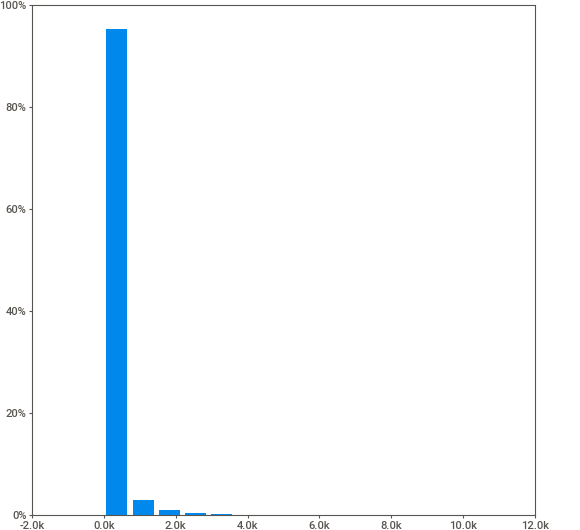
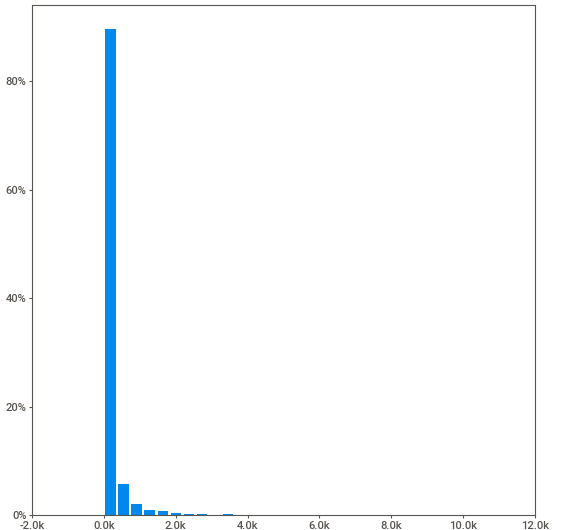
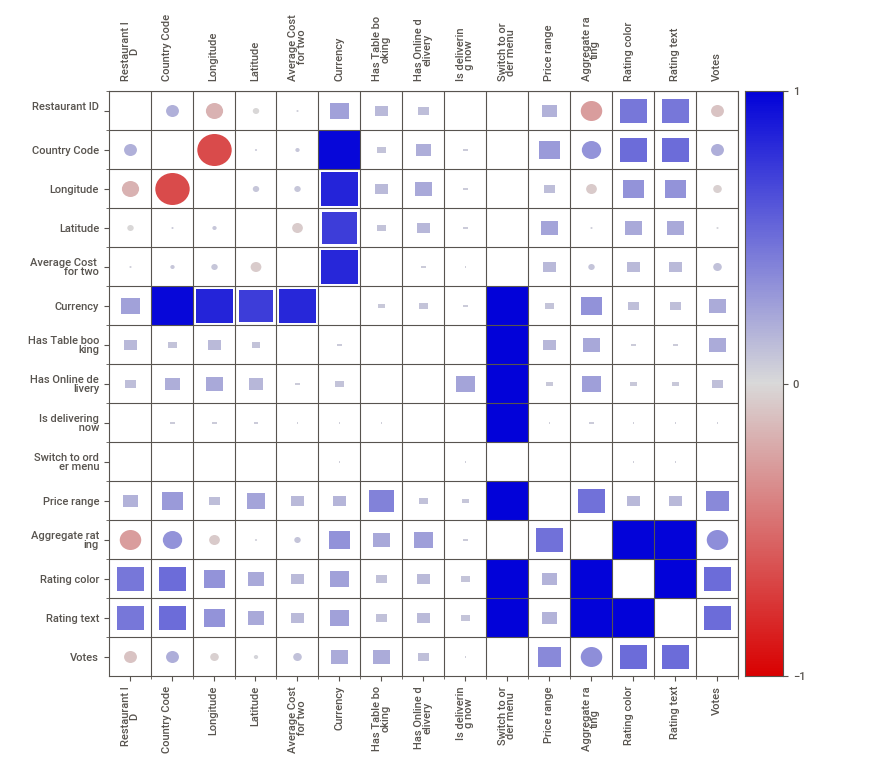
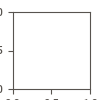

In [18]:
display(HTML('eda_report.html'))

In [19]:
from IPython.display import IFrame
IFrame(src='eda_report.html', width=1000, height=600)

In [20]:
import seaborn as sns

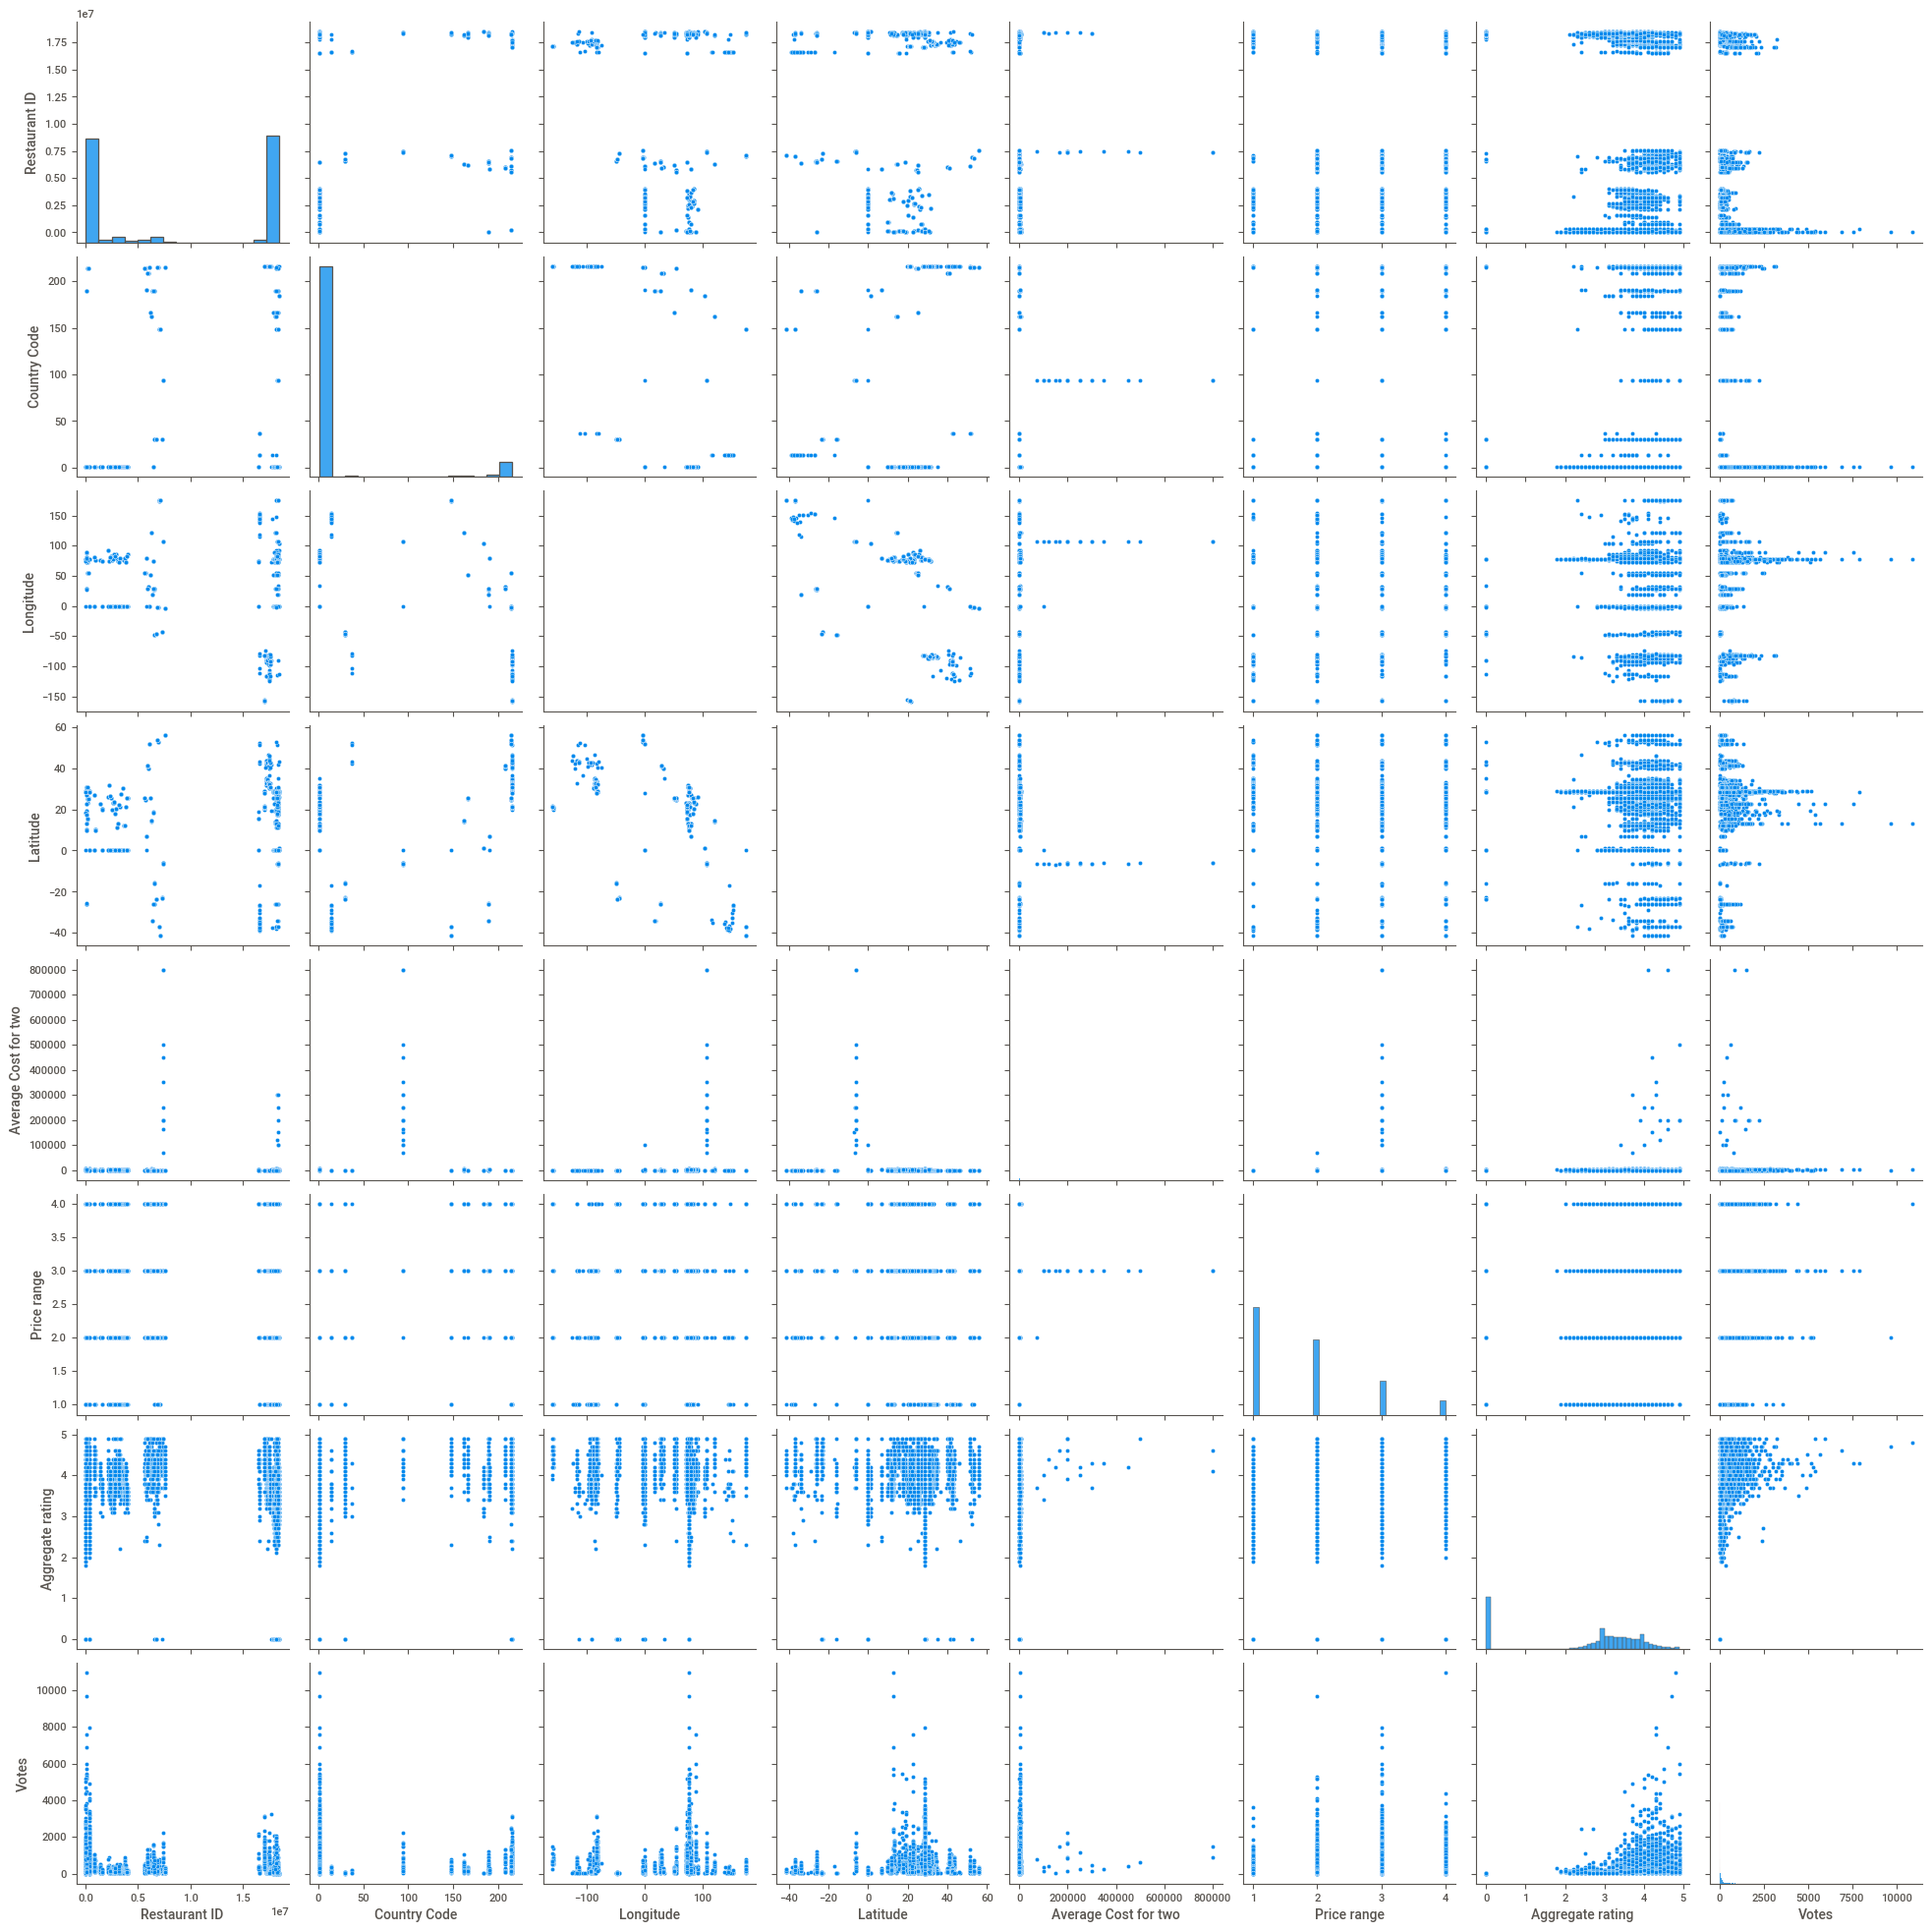

In [21]:
sns.pairplot(df)

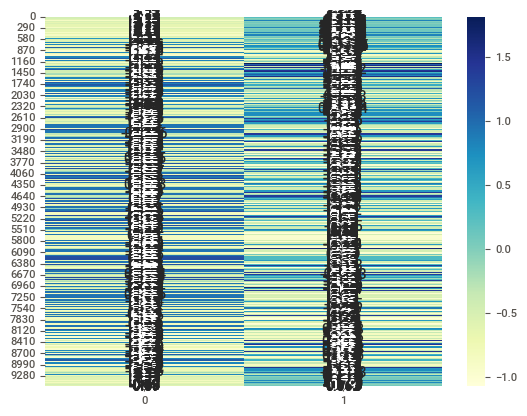

In [23]:
sns.heatmap(reduced_data,annot=True, cmap="YlGnBu")
plt.show()

<ipython-input-28-00b39ac427d5>:19: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.tight_layout()
<ipython-input-28-00b39ac427d5>:19: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


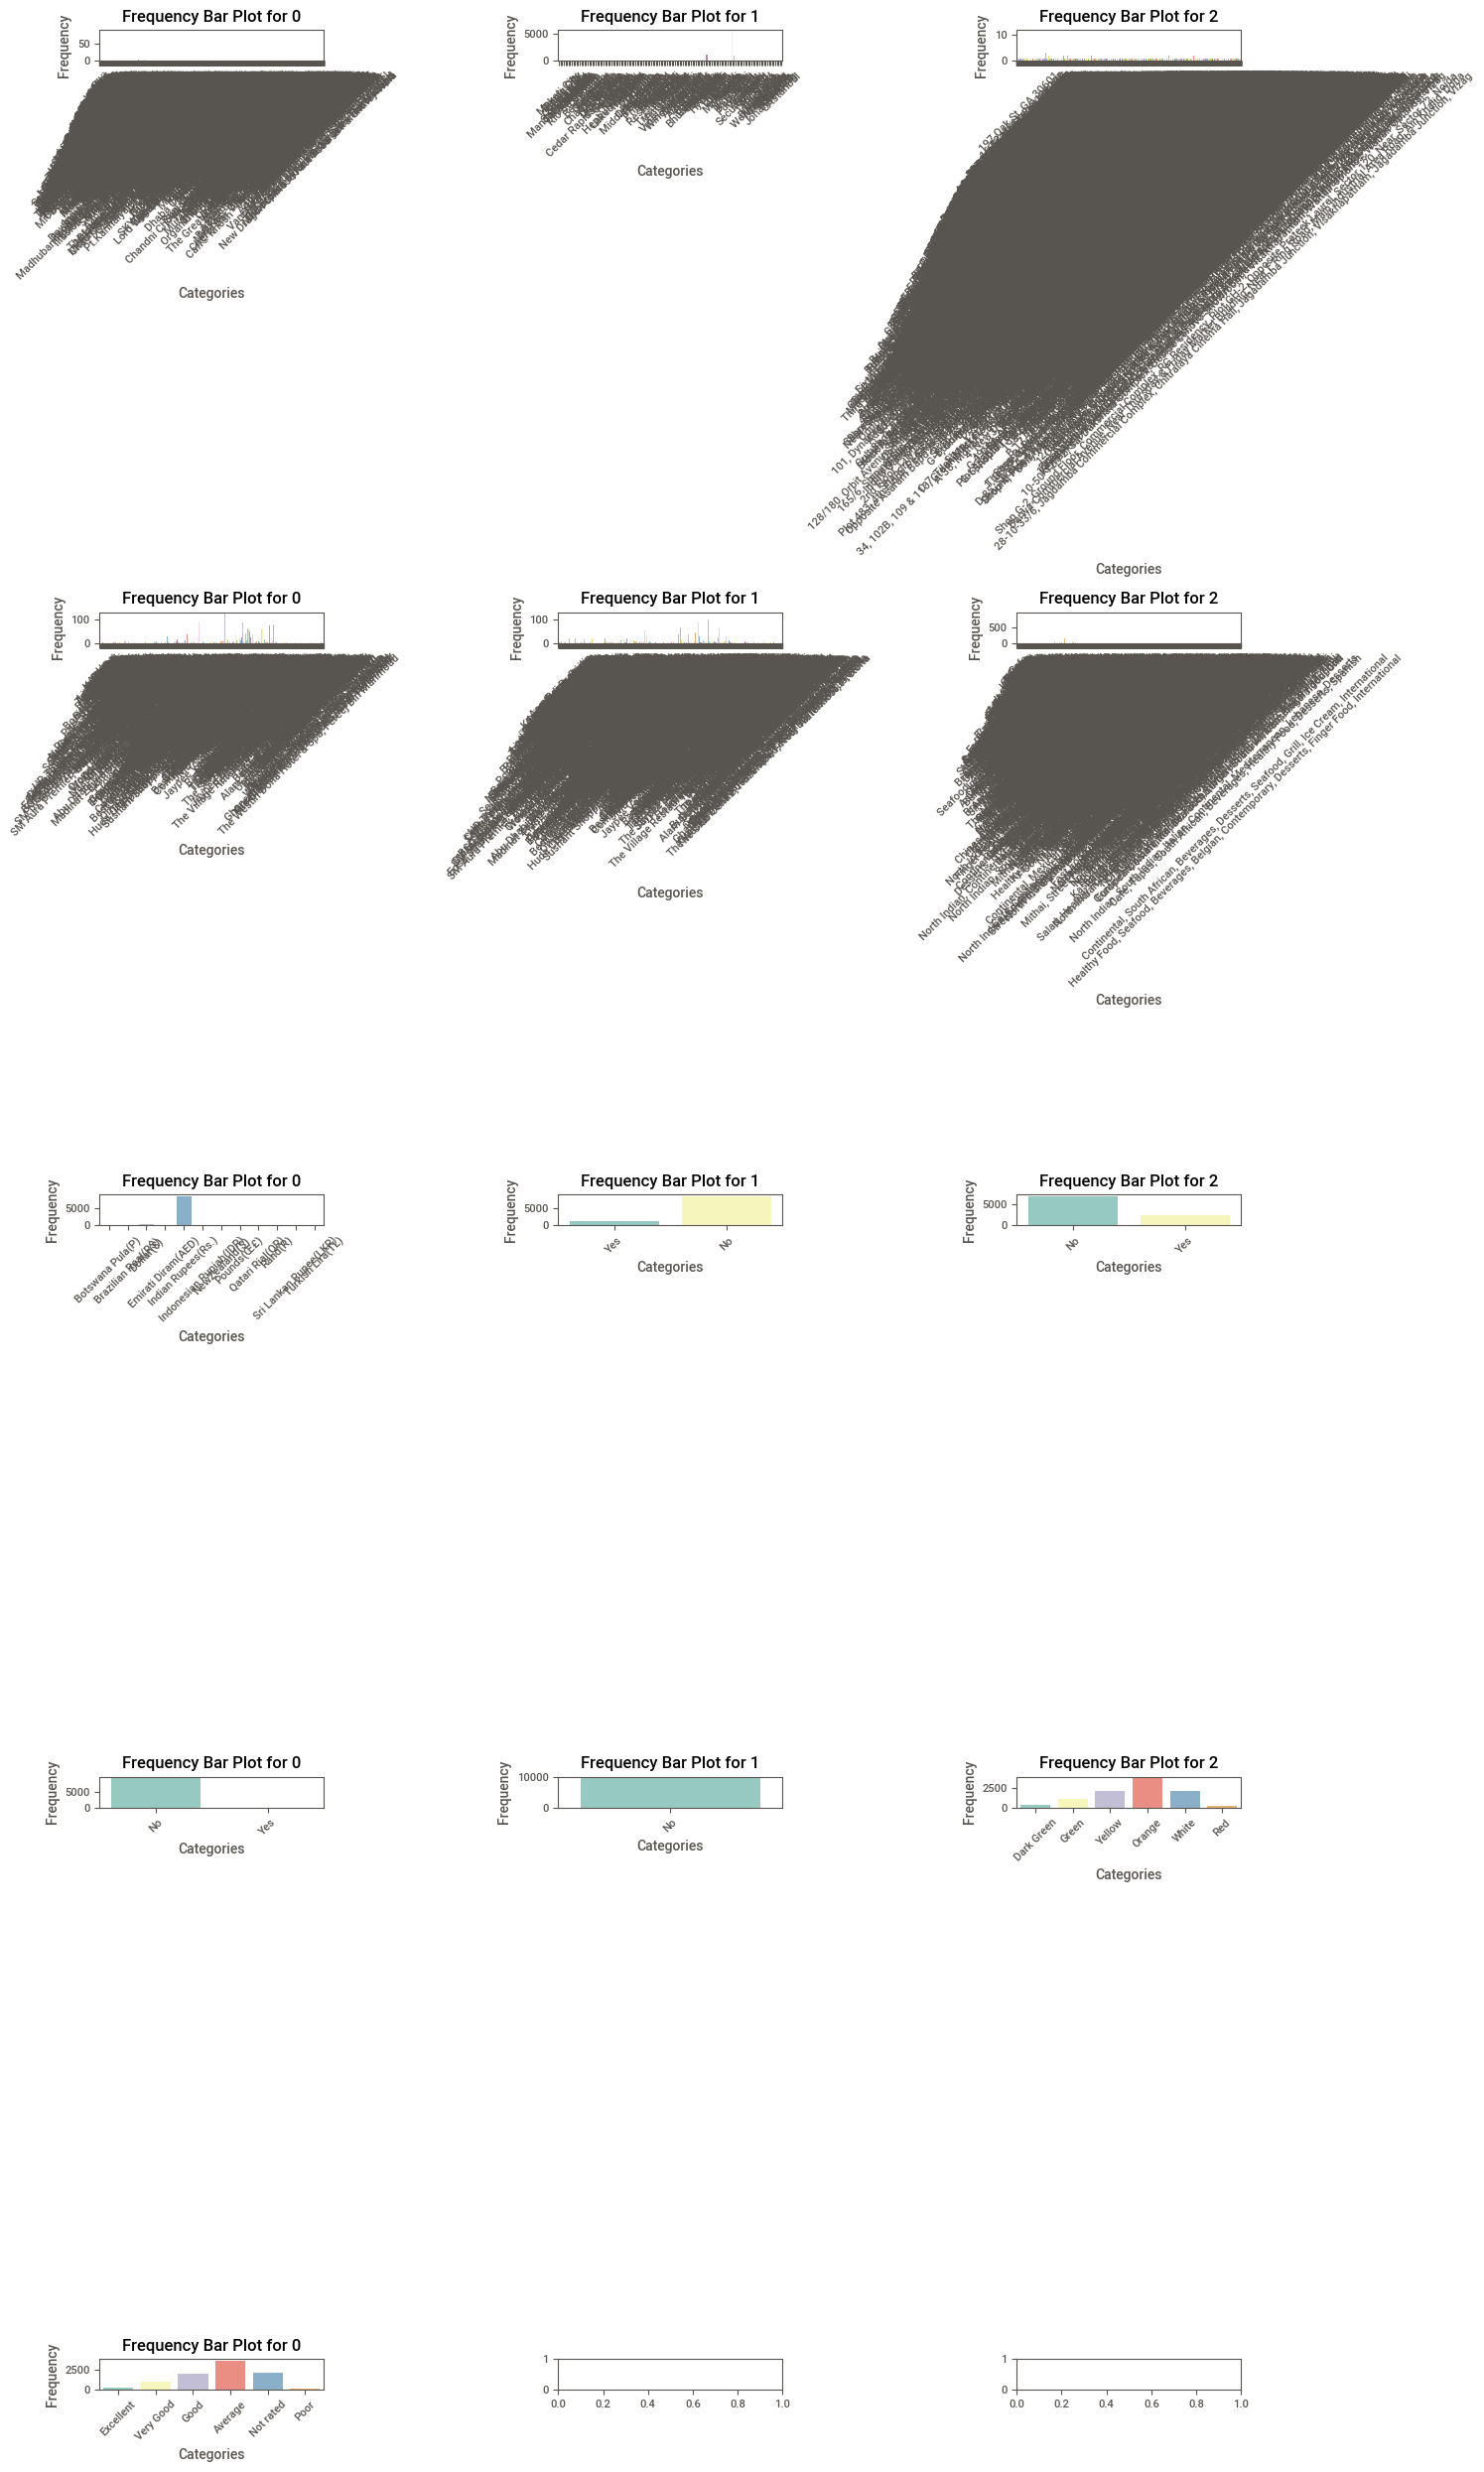

In [28]:
num_plots = len(cat_col)
num_rows = (num_plots // 3) + (num_plots % 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Loop through categorical columns and create frequency bar plots
for i, col_name in enumerate(cat_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(x=col_name, data=df, palette='Set3', ax=ax)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Bar Plot for {col}')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [32]:
from sklearn.ensemble import IsolationForest

# Create an IsolationForest instance
iso_forest = IsolationForest(contamination=0.05)

# Fit the model to your data
iso_forest.fit(encoded_data)

# Predict anomaly labels for your data
anomaly_labels = iso_forest.predict(encoded_data)

In [35]:
#anomaly_labels = encoder.inverse_transform(anomaly_labels)

# Print the anomaly labels
print(anomaly_labels)

[ 1  1  1 ...  1  1 -1]


-1 indicates an anomaly and 1 indicates a normal data point.


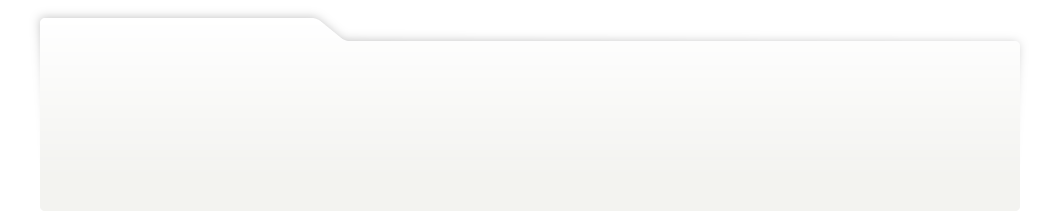
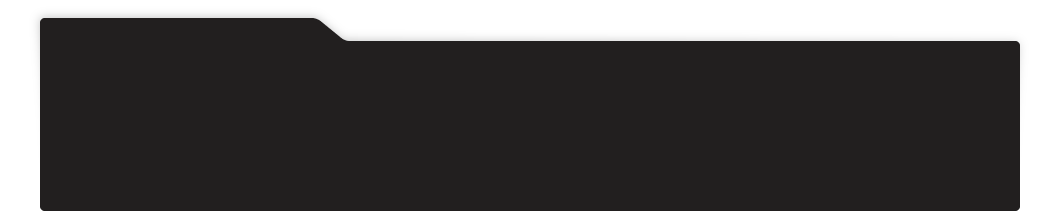
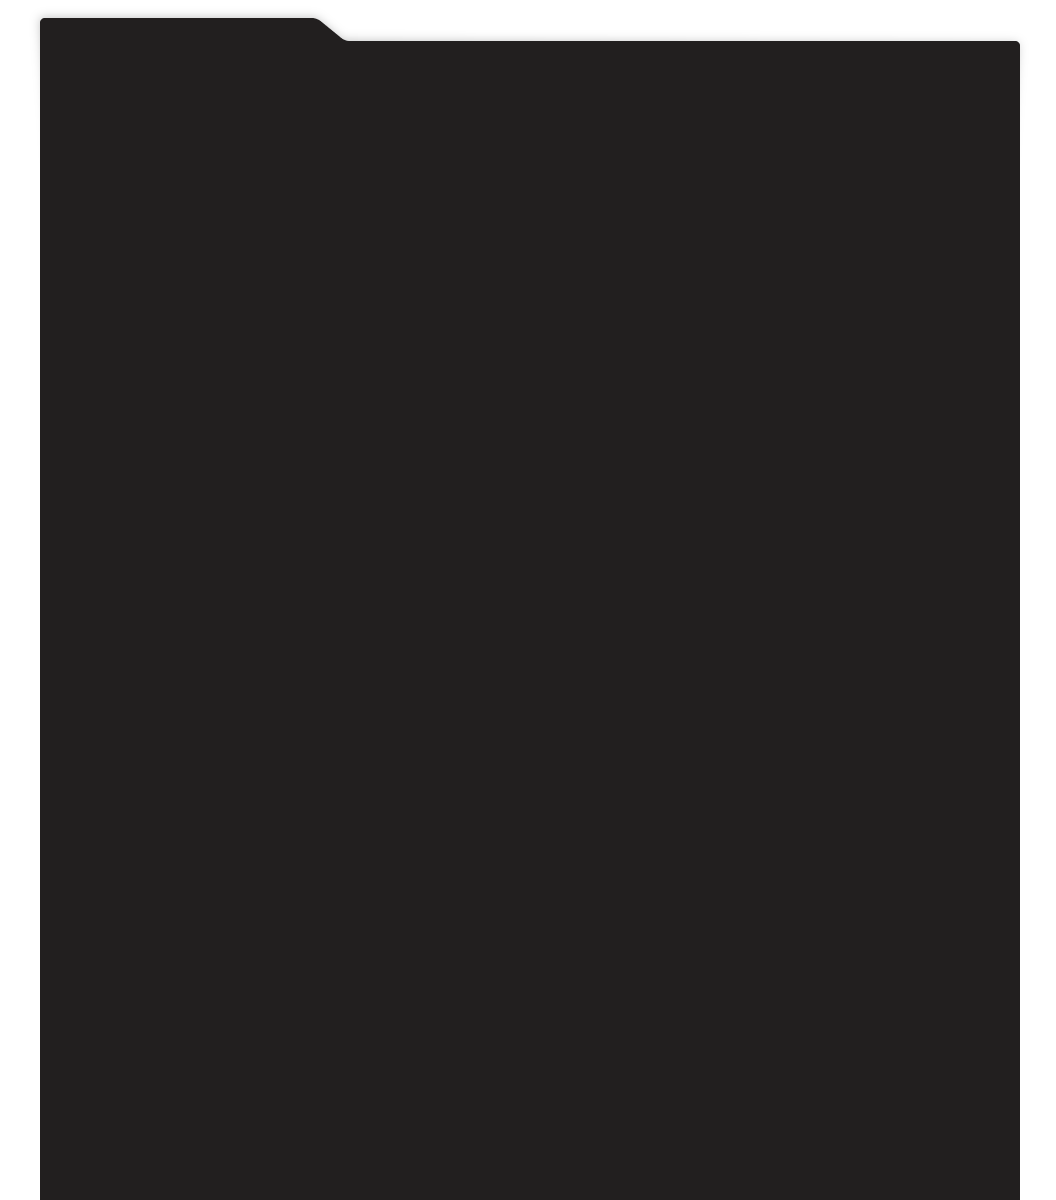
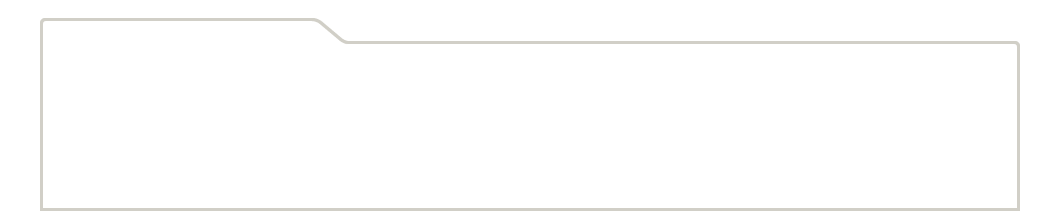
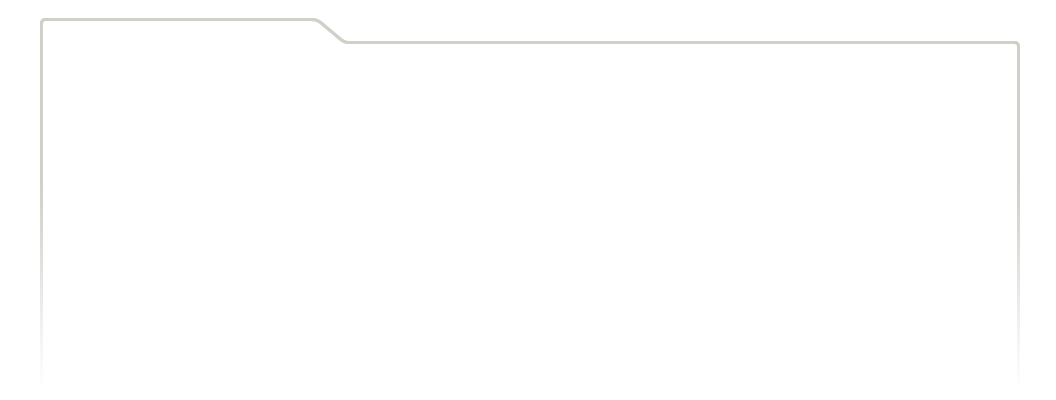
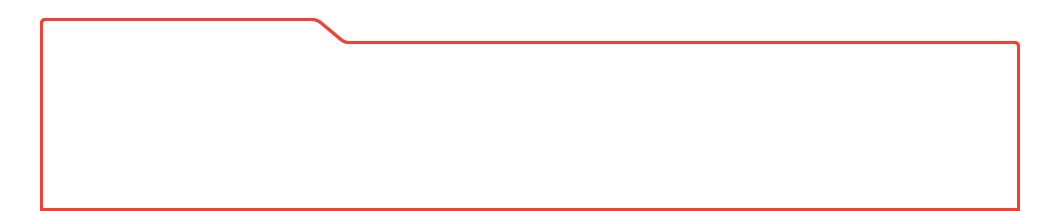
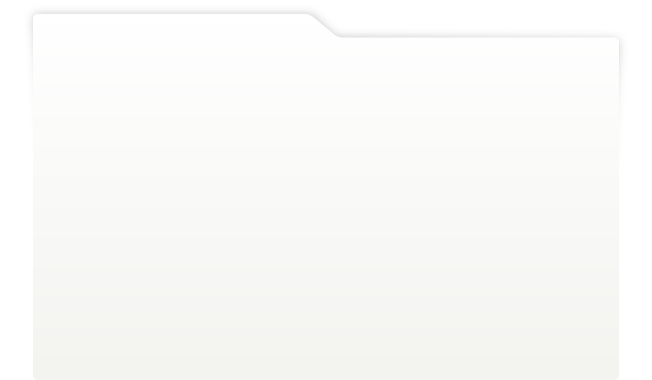
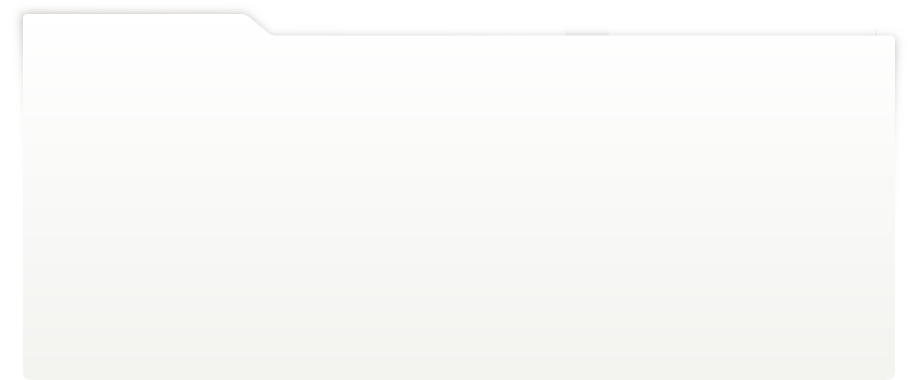
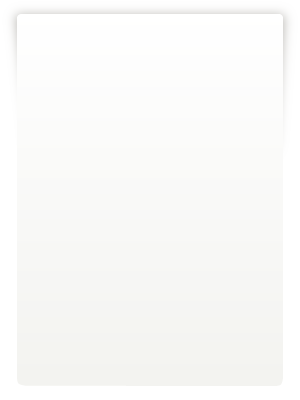
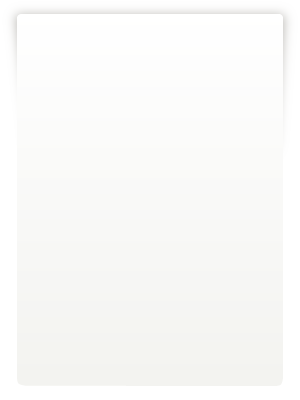
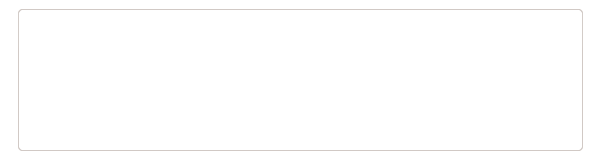
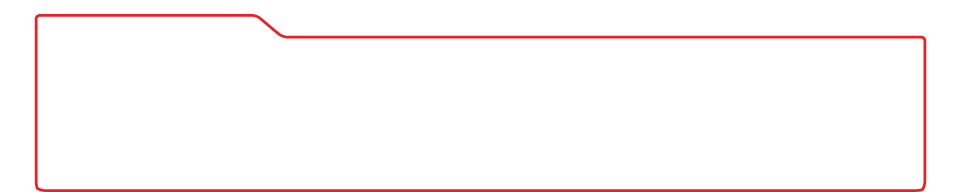
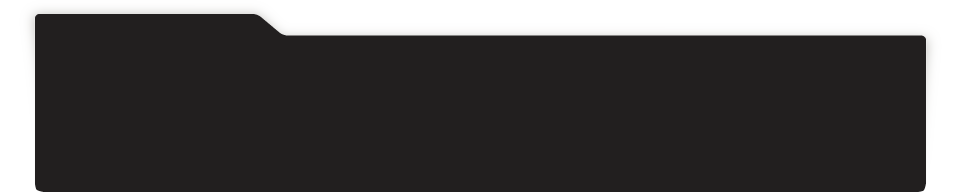
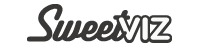
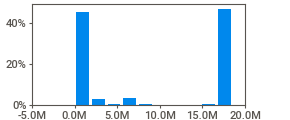
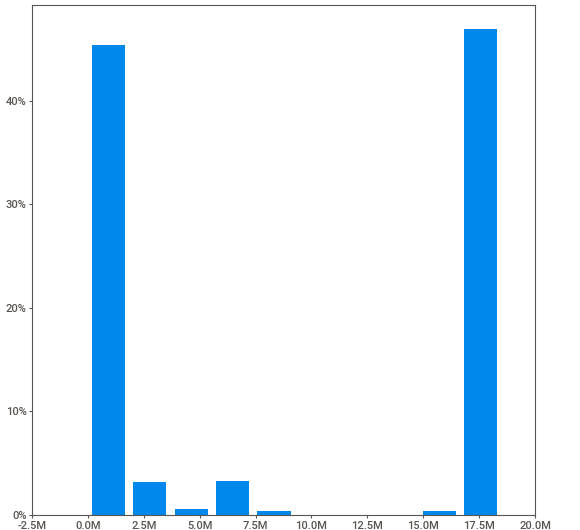
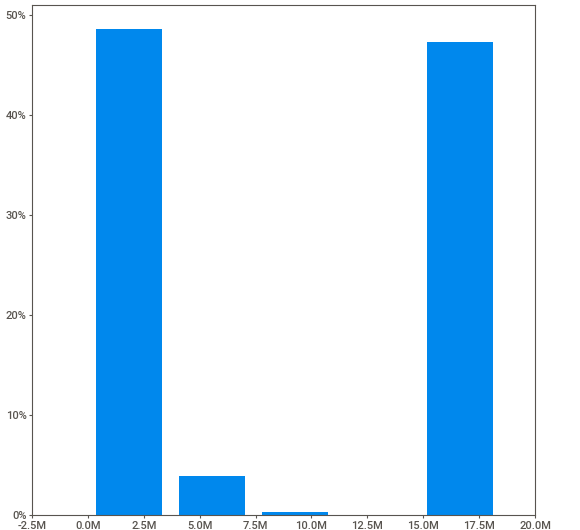
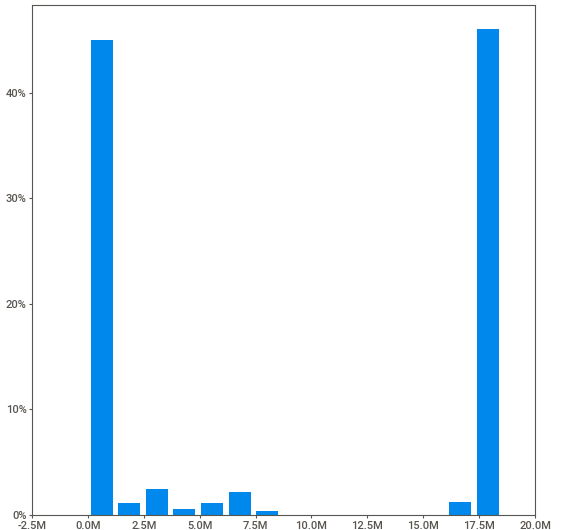
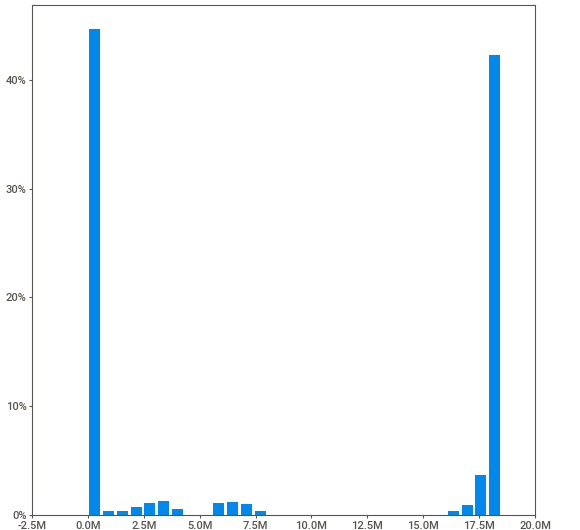
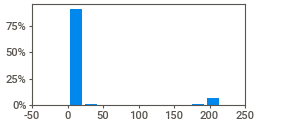
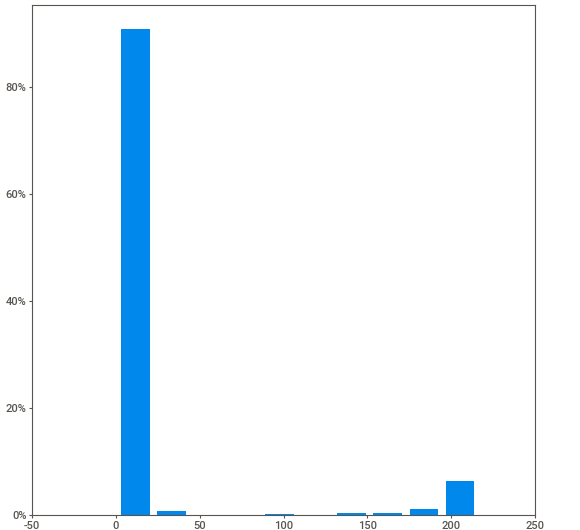
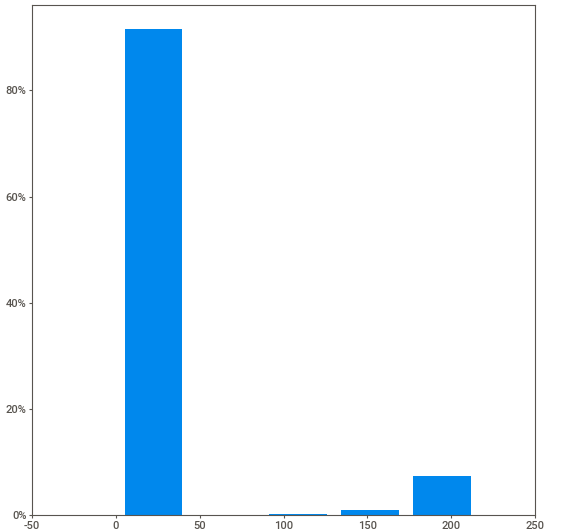
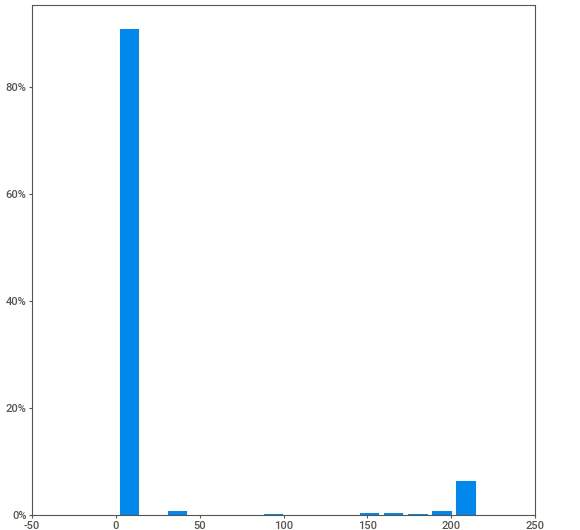
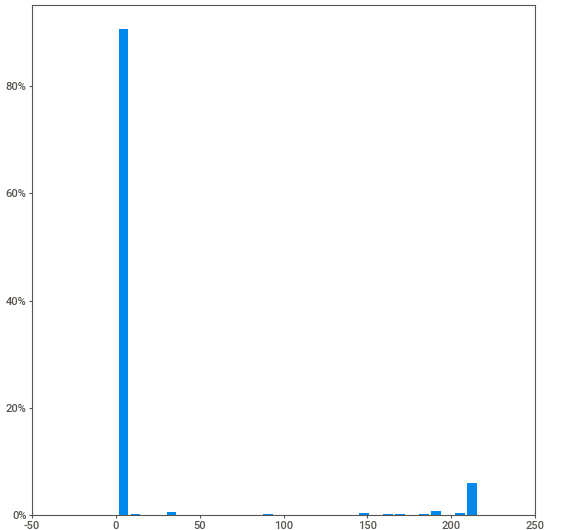
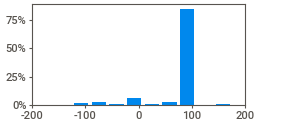
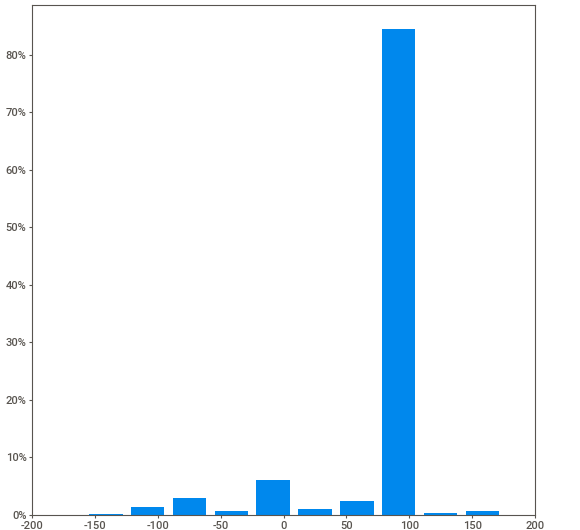
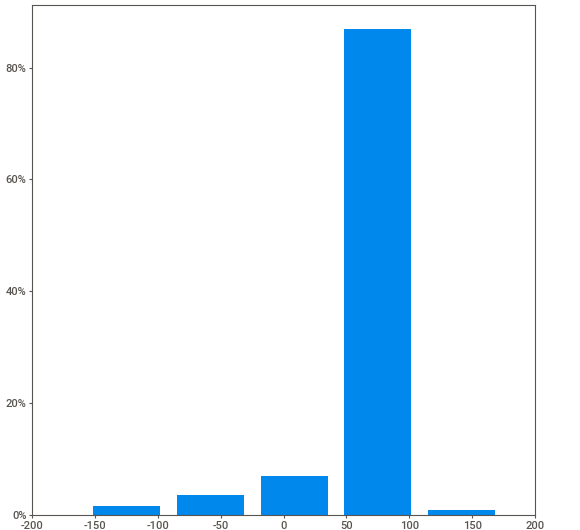
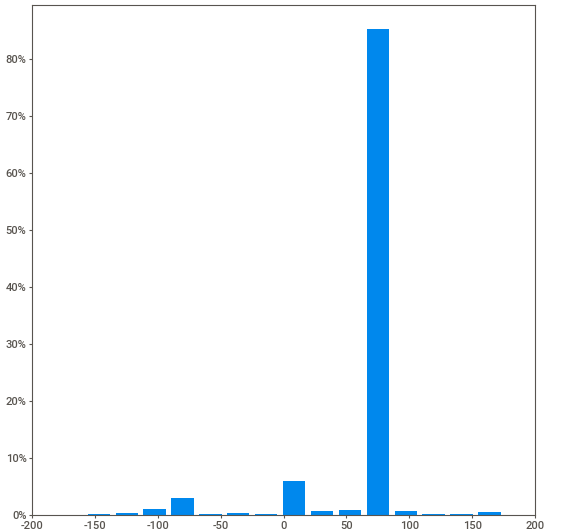
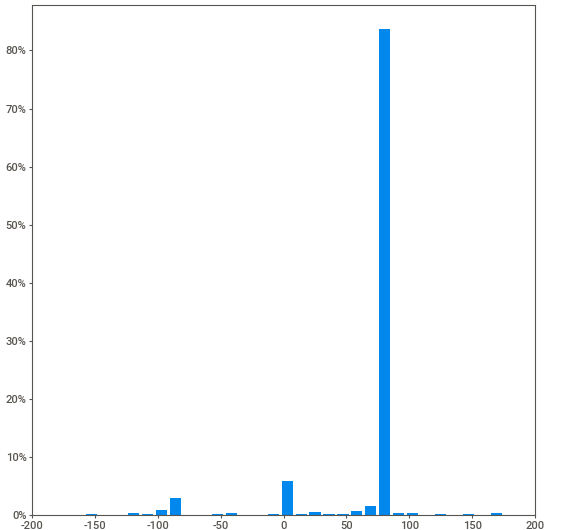
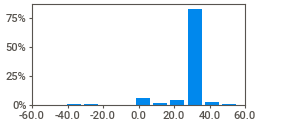
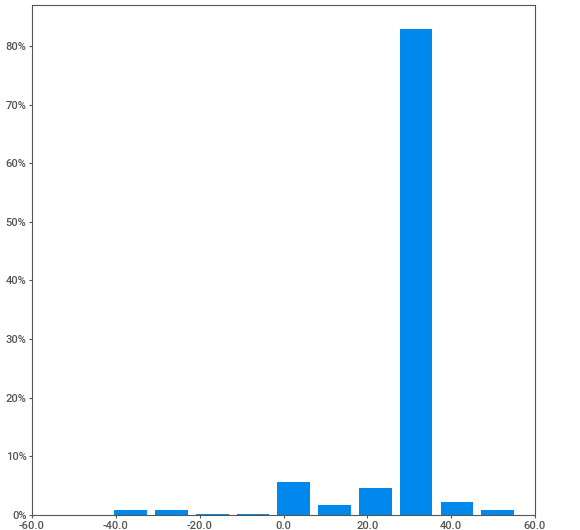
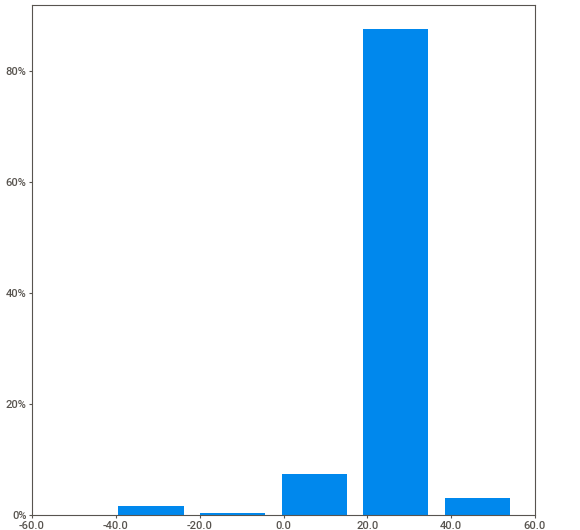
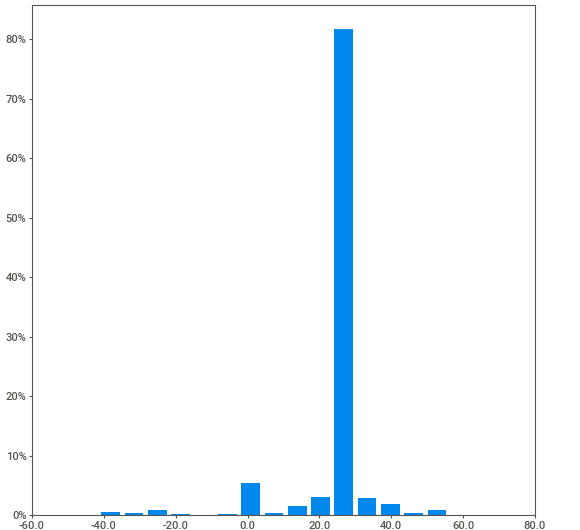
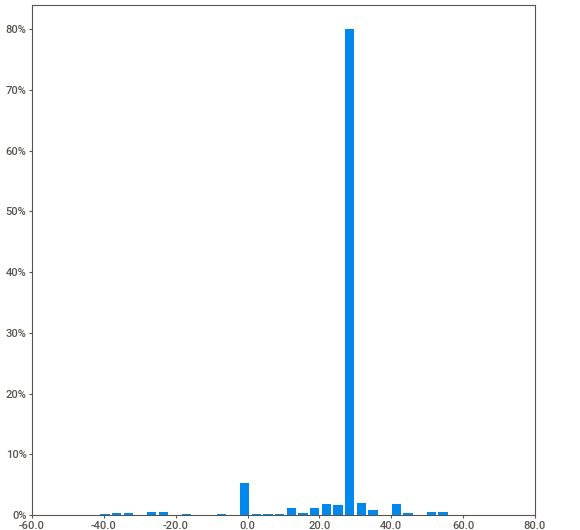
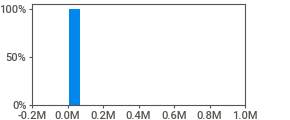
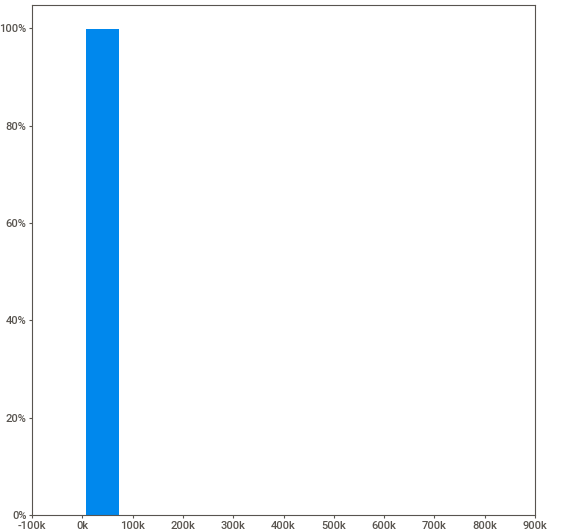
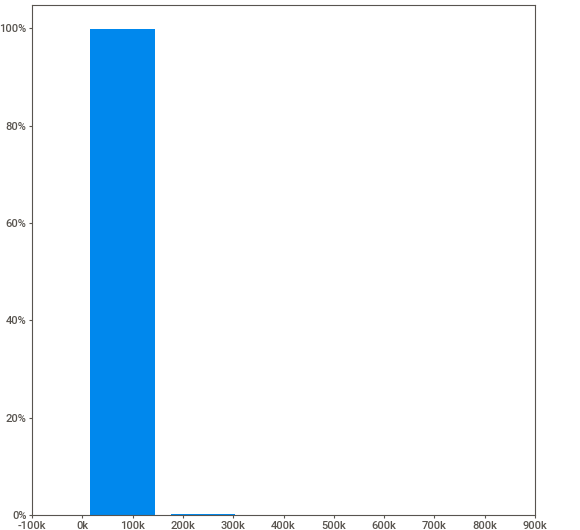
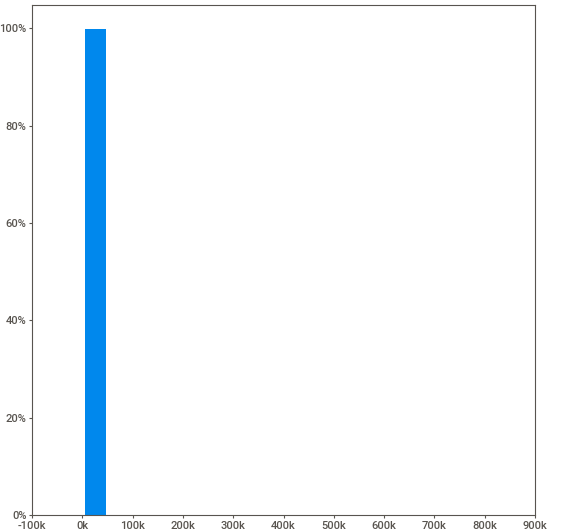
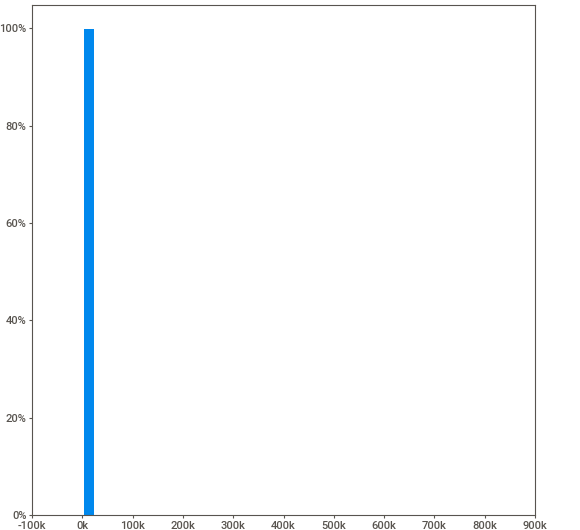
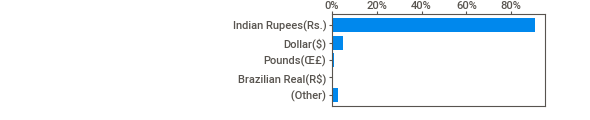
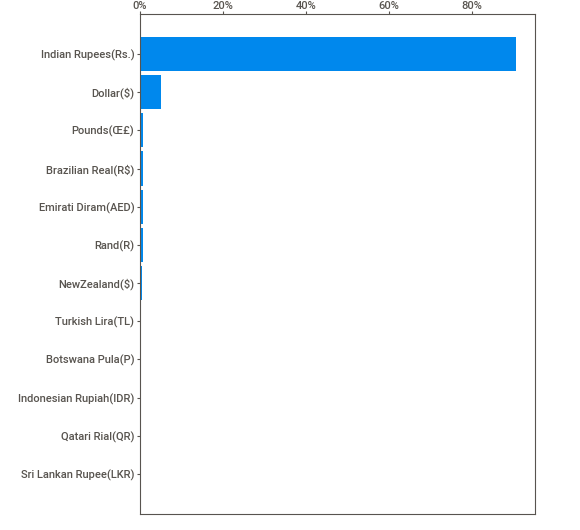
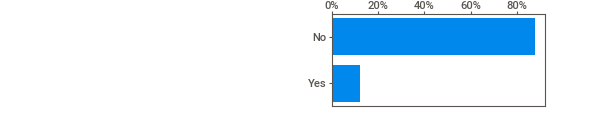
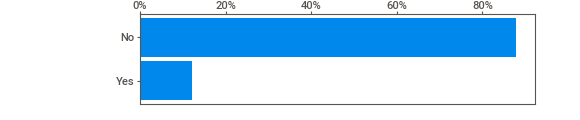
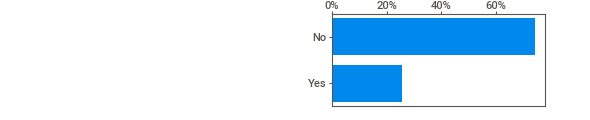
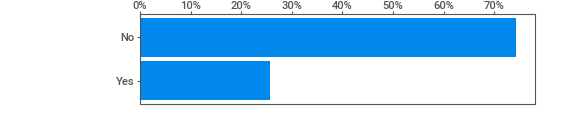
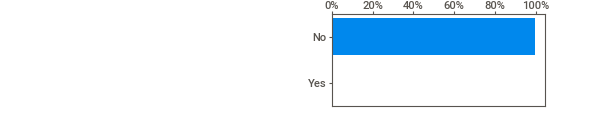
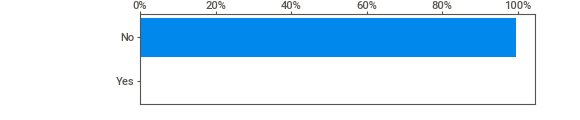
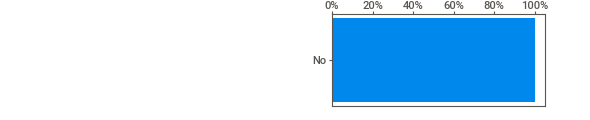
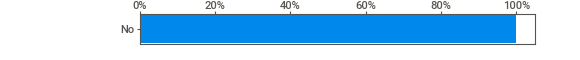
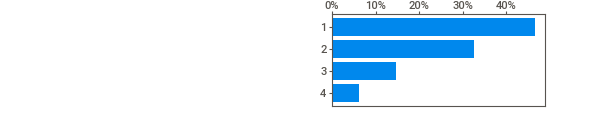
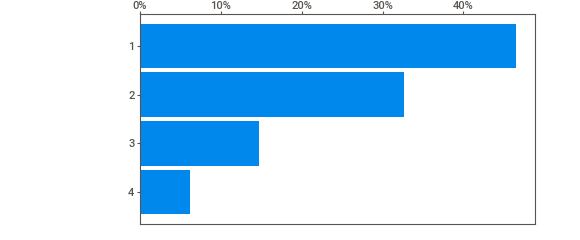
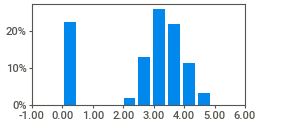
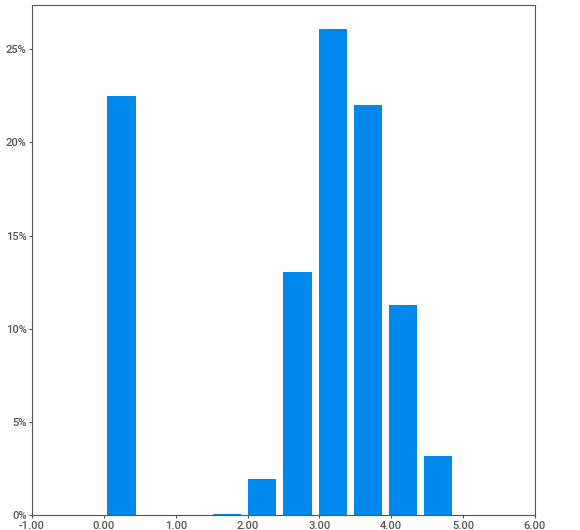
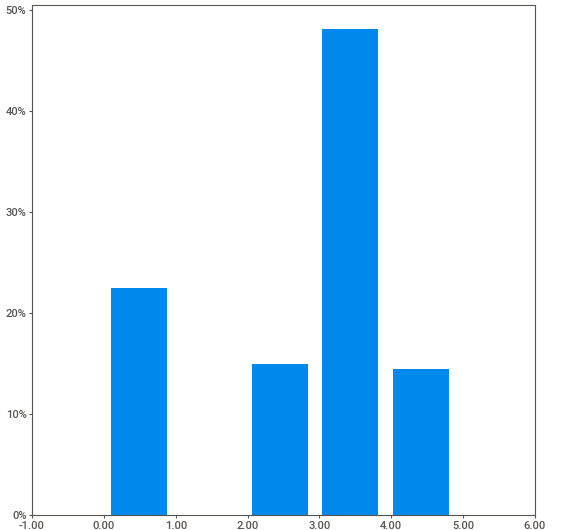
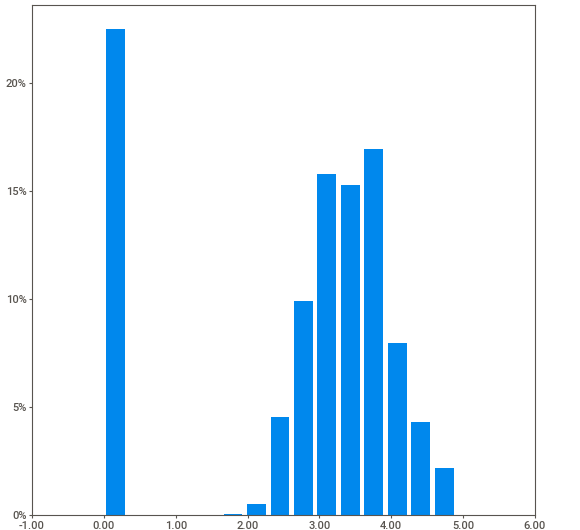
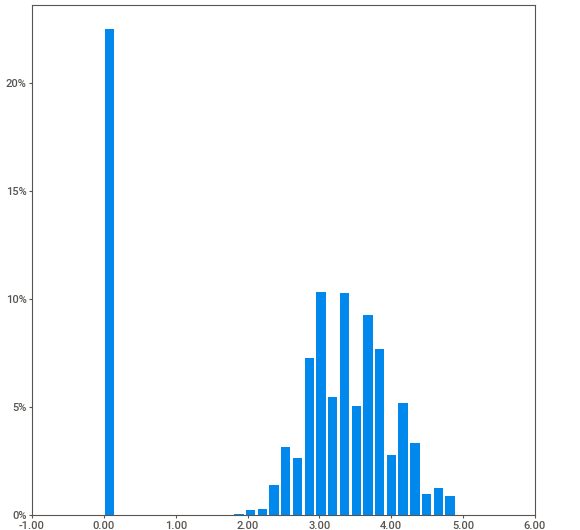
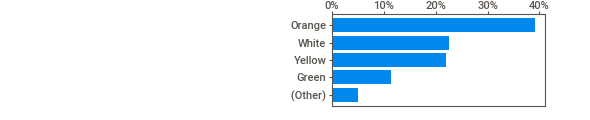
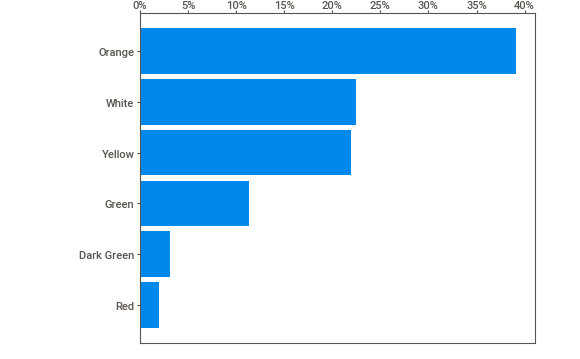
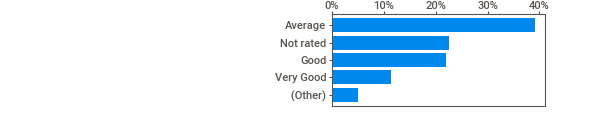
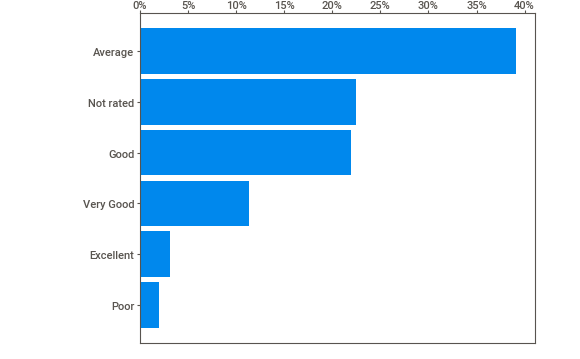
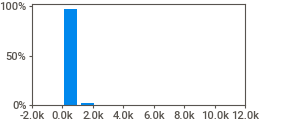
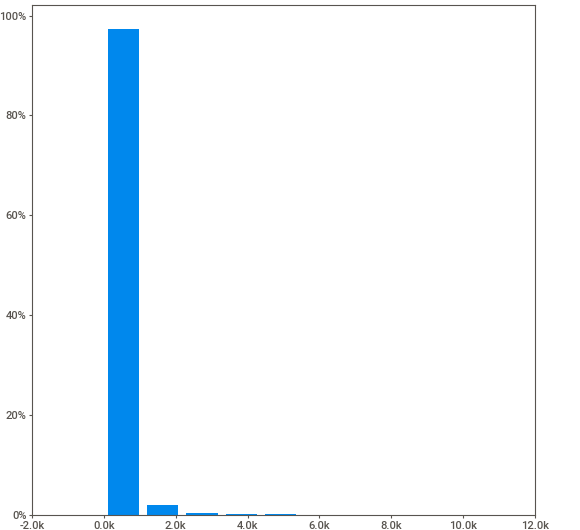
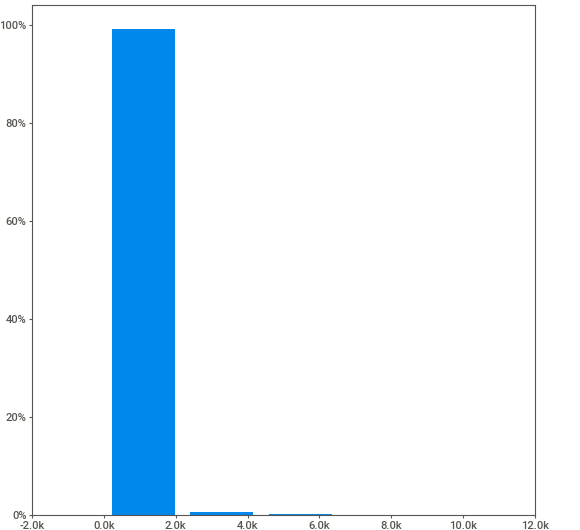
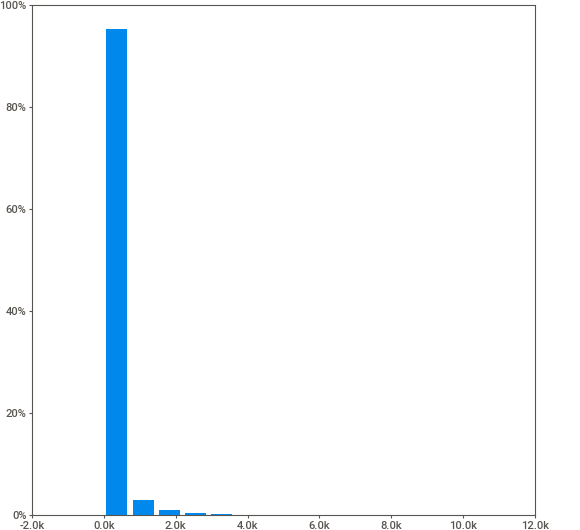
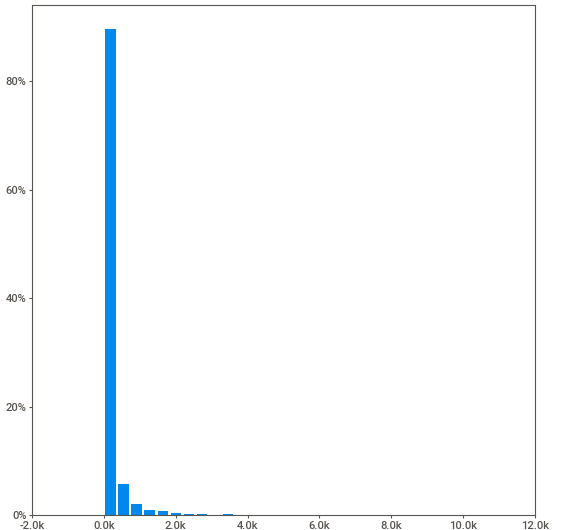
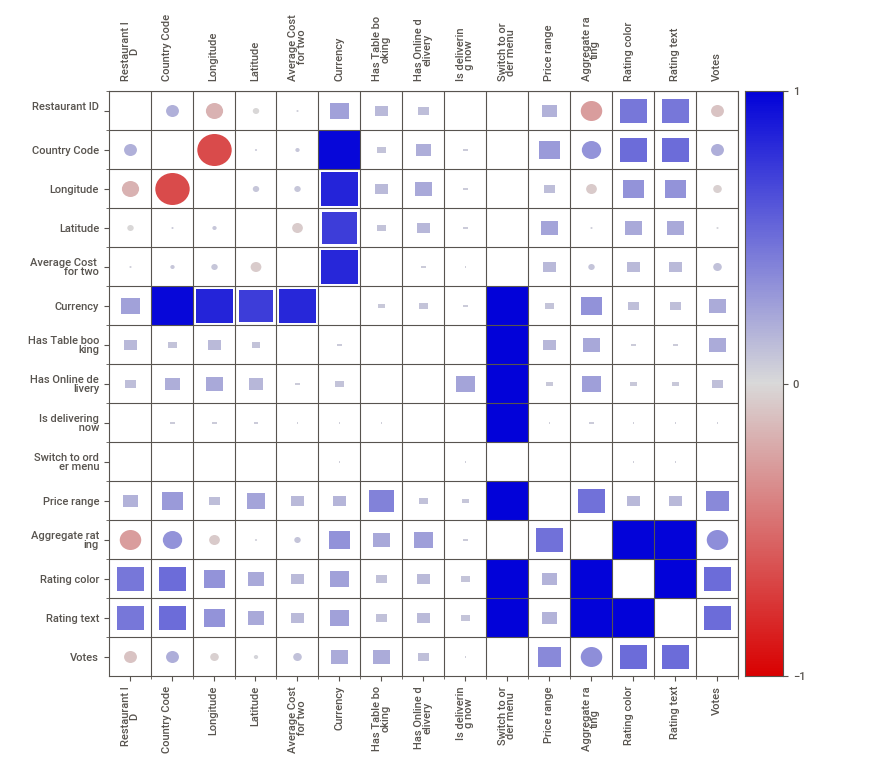
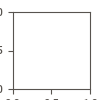

In [37]:
from IPython.display import HTML

# Read the content of the HTML file
with open('eda_report.html', 'r') as file:
    html_content = file.read()

# Display the HTML content in the notebook
display(HTML(html_content))

In [39]:
import webbrowser
html_file_path = 'eda_report.html'

# Open the HTML file in the default web browser
webbrowser.open_new_tab('file://' + html_file_path)


False